# Importing libraries and datasets

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, GRU, Conv1D, Dense, Dropout, \
                                    ReLU, MaxPooling1D, Flatten, \
                                    BatchNormalization, \
                                    Bidirectional, \
                                    MaxPool1D

from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from keras.models import load_model
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings("ignore")

* Function to read missing value from dataframe

In [ ]:
# Missing values
def missing_values(df):

  # Check missing value from dataset
  missing_value = df.isnull().sum()

  # Convert total missing value into percentage
  missing_percent = (100 * missing_value) / len(df)

  # Create a dataframe of missing values
  missing_table = pd.concat([missing_value, missing_percent], axis=1)

  # Rename the columns
  missing_table_rename = missing_table.rename( \
                          columns = {0 : 'Missing values', \
                                     1 : 'Missing percentage (%)'})

  # Sort missing value in descending order
  missing_table_rename = missing_table_rename[ \
  missing_table_rename.iloc[:,1] != 0] \
  .sort_values('Missing percentage (%)', ascending=False).round(1)

  # Dataframe information
  print('The dataset has total of: ' + str(df.shape[1]) + \
        ' columns.\n' + 'Columns that have missing values: ' + \
        str(missing_table_rename.shape[0]) + ' columns')

  return missing_table_rename.style.background_gradient(cmap='Reds')




*   Mount to drive



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


*   Read dataset from drive




In [ ]:
dataset_1 = pd.read_csv("/content/drive/MyDrive/DATASET FOR PROJECT/city_day.csv")
dataset_2 = pd.read_csv("/content/drive/MyDrive/DATASET FOR PROJECT/taiwan2015.csv")
cities_of_uses = ['Bengaluru', 'Chennai', 'Delhi']
dataset_1 = dataset_1[dataset_1['City'].isin(cities_of_uses)]

# Convert date in datasets into date time format

dataset_1["Date"] = pd.to_datetime(dataset_1["Date"])
dataset_2["Date"] = pd.to_datetime(dataset_2["Date"])

In [ ]:
dataset_2.drop(dataset_2.columns[0], axis=1, inplace=True)
dataset_2.drop(dataset_2.columns[0], axis=1, inplace=True)

In [ ]:
dataset_2

,month,day,hour,station,AMB_TEMP,CO,NOx,O3,PM10,PM2.5,...,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,1,1,0,Banqiao,16.0,0.79,17.0,37.0,177.0,78.0,...,37.0,0.000000,0.000000,0.000000,0.000000,39.5,37.0,2,NaN,NaN
1,1,1,1,Banqiao,16.0,0.80,17.0,36.0,178.0,77.0,...,37.0,0.000000,0.000000,0.000000,0.000000,40.0,37.0,2,NaN,NaN
2,1,1,2,Banqiao,16.0,0.71,14.0,38.0,163.0,72.0,...,38.0,0.000000,0.000000,0.000000,0.000000,40.0,38.0,2,NaN,NaN
3,1,1,3,Banqiao,15.0,0.66,12.0,39.0,147.0,65.0,...,39.0,0.000000,0.000000,0.000000,0.000000,40.0,39.0,2,NaN,NaN
4,1,1,4,Banqiao,15.0,0.53,11.0,38.0,131.0,56.0,...,39.0,0.000000,0.000000,0.000000,0.000000,40.0,39.0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76414,12,23,18,izhi,17.0,0.67,18.0,55.0,116.0,61.0,...,55.0,43.263889,49.708333,4.401042,21.666667,34.5,55.0,6,55.0,Satisfactory
76415,12,23,19,izhi,17.0,0.68,23.0,45.0,116.0,62.0,...,55.0,47.013889,54.083333,4.578125,21.718750,34.5,55.0,6,55.0,Satisfactory
76416,12,23,20,izhi,17.0,0.60,18.0,44.0,118.0,60.0,...,55.0,50.347222,58.333333,4.682292,21.458333,34.5,55.0,6,58.0,Satisfactory
76417,12,23,21,izhi,17.0,0.58,17.0,42.0,111.0,59.0,...,55.0,53.611111,62.083333,4.744792,21.197917,34.5,55.0,6,62.0,Satisfactory


In [ ]:
dataset_2['AQI_bucket_calculated'].value_counts()

Good            30936
Satisfactory    26538
Moderate        18491
Severe            150
Poor               95
Very Poor          56
Name: AQI_bucket_calculated, dtype: int64

# Data Visualization

## Dataset 1 - city_day.csv

In [ ]:
dataset_1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
4295,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,NaN,NaN,NaN
4296,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,NaN,NaN,NaN
4297,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,NaN,NaN,NaN
4298,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,NaN,NaN,NaN


* Null values in dataset

In [ ]:
missing_values(dataset_1)

The dataset has total of: 16 columns.
Columns that have missing values: 14 columns


,Missing values,Missing percentage (%)
Xylene,4799,79.600000
PM10,2144,35.600000
NH3,674,11.200000
Benzene,551,9.100000
Toluene,346,5.700000
O3,277,4.600000
PM2.5,265,4.400000
AQI,234,3.900000
AQI_Bucket,234,3.900000
SO2,152,2.500000


In [ ]:
dataset_1.corr().AQI.sort_values(ascending = False)

AQI        1.000000
PM10       0.916493
PM2.5      0.882495
NO         0.724523
NO2        0.704465
NOx        0.685118
SO2        0.622451
O3         0.465975
Toluene    0.425619
CO         0.257672
Xylene     0.231137
Benzene    0.172760
NH3        0.135920
Name: AQI, dtype: float64

In [ ]:
# how much is the average amount of pollution in each city stations
most_polluted = dataset_1[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Delhi,259.487744,232.809229,1.976053
Chennai,114.502654,62.834404,1.067349
Bengaluru,94.318325,83.243287,1.838634


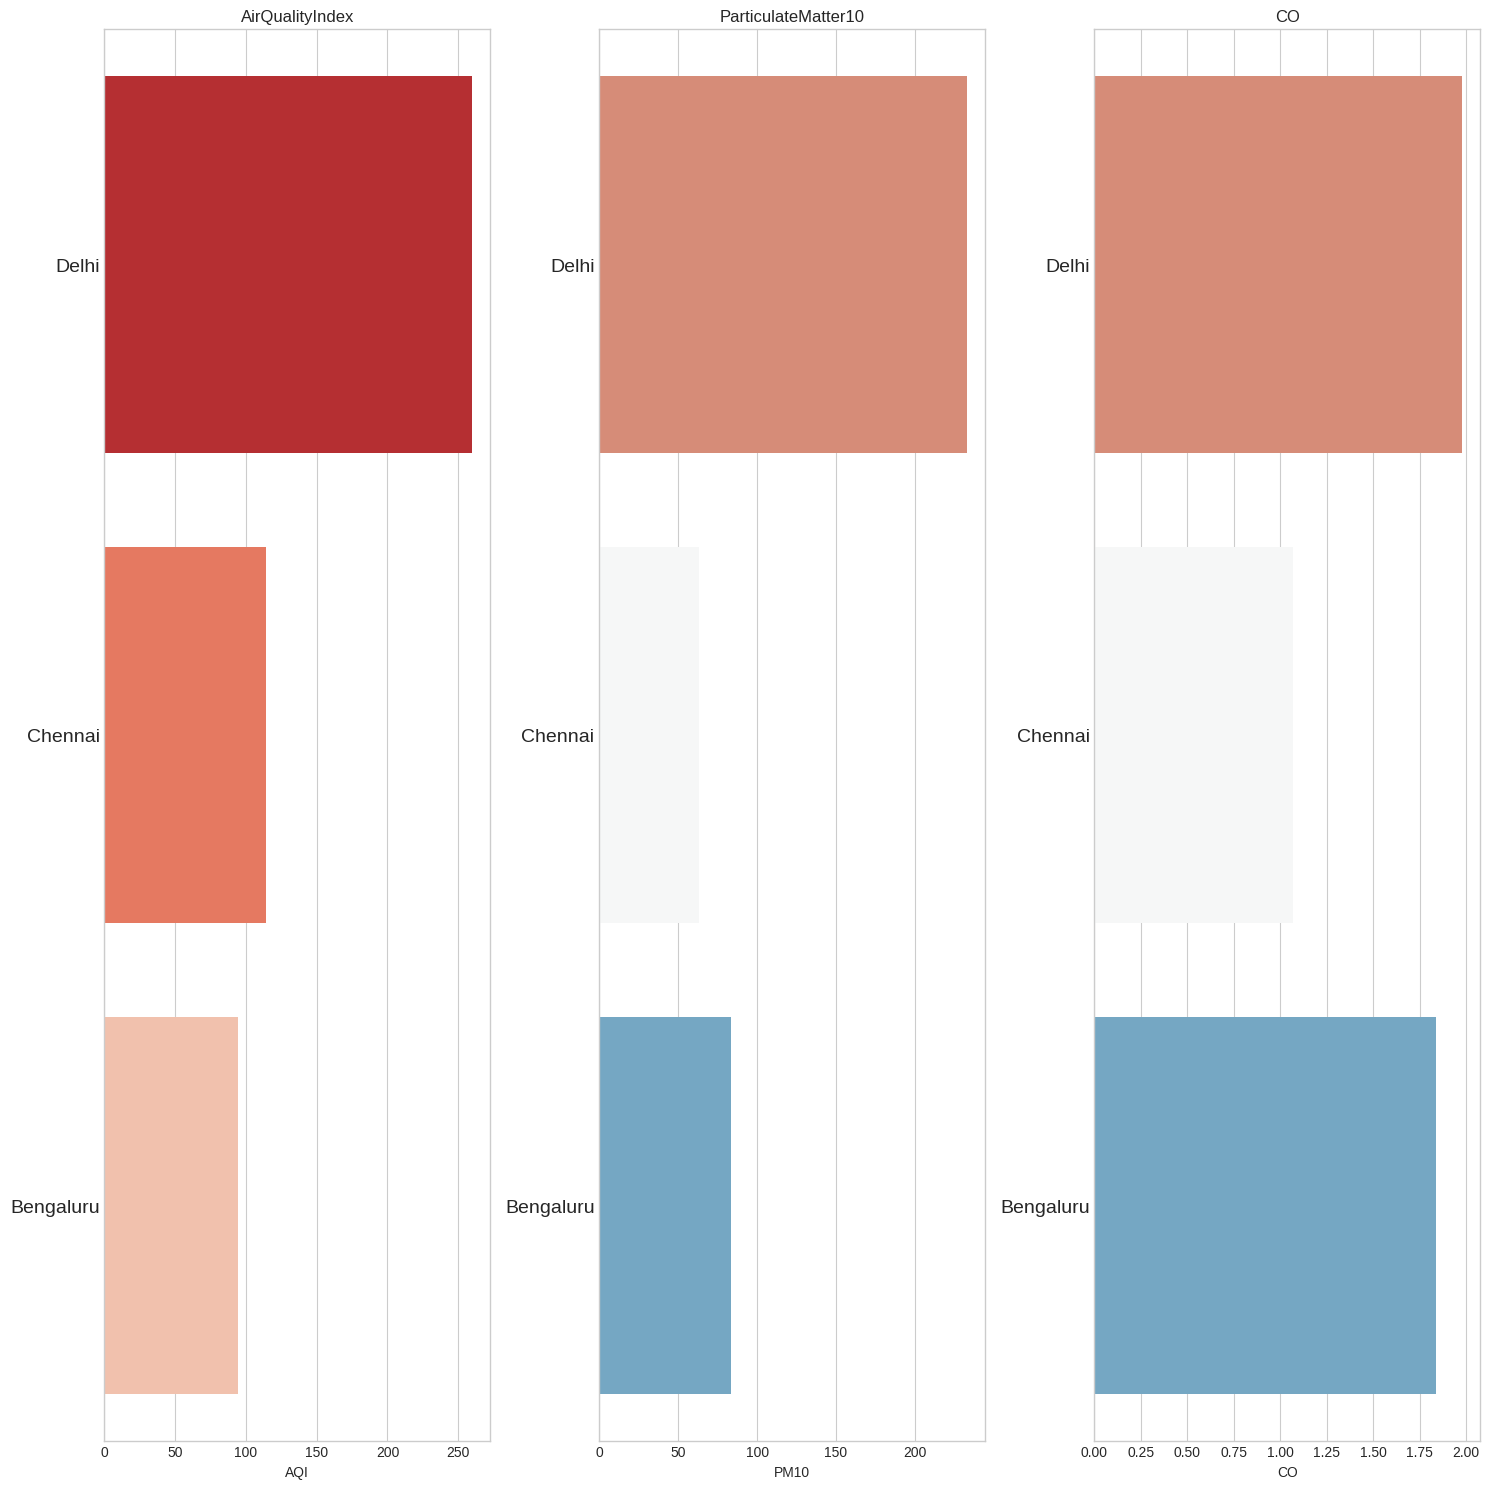

In [ ]:
# 10 station with most pollution
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI[:10],
                   y = most_polluted.index[:10],
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10[:10],
                   y = most_polluted.index[:10],
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO[:10],
                   y = most_polluted.index[:10],
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [ ]:
# Sum of pollution
import plotly.express as px

df = dataset_1.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()[:10]
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

## Dataset 2 - Taiwan

In [ ]:
dataset_2.head()

,month,day,hour,station,AMB_TEMP,CO,NOx,O3,PM10,PM2.5,...,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,1,1,0,Banqiao,16.0,0.79,17.0,37.0,177.0,78.0,...,37.0,0.0,0.0,0.0,0.0,39.5,37.0,2,NaN,NaN
1,1,1,1,Banqiao,16.0,0.80,17.0,36.0,178.0,77.0,...,37.0,0.0,0.0,0.0,0.0,40.0,37.0,2,NaN,NaN
2,1,1,2,Banqiao,16.0,0.71,14.0,38.0,163.0,72.0,...,38.0,0.0,0.0,0.0,0.0,40.0,38.0,2,NaN,NaN
3,1,1,3,Banqiao,15.0,0.66,12.0,39.0,147.0,65.0,...,39.0,0.0,0.0,0.0,0.0,40.0,39.0,2,NaN,NaN
4,1,1,4,Banqiao,15.0,0.53,11.0,38.0,131.0,56.0,...,39.0,0.0,0.0,0.0,0.0,40.0,39.0,2,NaN,NaN


In [ ]:
missing_values(dataset_2)

The dataset has total of: 30 columns.
Columns that have missing values: 6 columns


,Missing values,Missing percentage (%)
AQI_calculated,153,0.200000
AQI_bucket_calculated,153,0.200000
PM10_24hr_avg,135,0.200000
PM2.5_24hr_avg,135,0.200000
SO2_24hr_avg,135,0.200000
NOx_24hr_avg,135,0.200000


In [ ]:
dataset_2.corr().AQI_calculated.sort_values(ascending = False)[:10]

AQI_calculated    1.000000
PM10_SubIndex     0.905715
PM10_24hr_avg     0.899831
O3_SubIndex       0.416989
O3_8hr_max        0.413495
CO_SubIndex       0.386145
NOx_SubIndex      0.377310
NOx_24hr_avg      0.374795
CO_8hr_max        0.354165
NOx               0.310155
Name: AQI_calculated, dtype: float64

In [ ]:
# how much is the average amount of pollution in each city stations
most_polluted = dataset_2[['station', 'AQI_calculated', 'PM10', 'CO']].groupby(['station']).mean().sort_values(by = 'AQI_calculated', ascending = False)
most_polluted

,AQI_calculated,PM10,CO
station,,,
Sanchong,138.540706,55.644157,1.510338
Datong,134.727877,53.341597,1.391265
Guanyin,68.540722,61.165794,0.280124
Banqiao,58.919242,45.755202,0.581640
Linkou,58.326514,47.660317,0.338000
Guting,55.686821,45.016267,0.525710
Cailiao,55.401073,42.848651,0.570439
izhi,53.226346,39.875818,0.427011
Keelung,49.839722,29.857668,0.365808


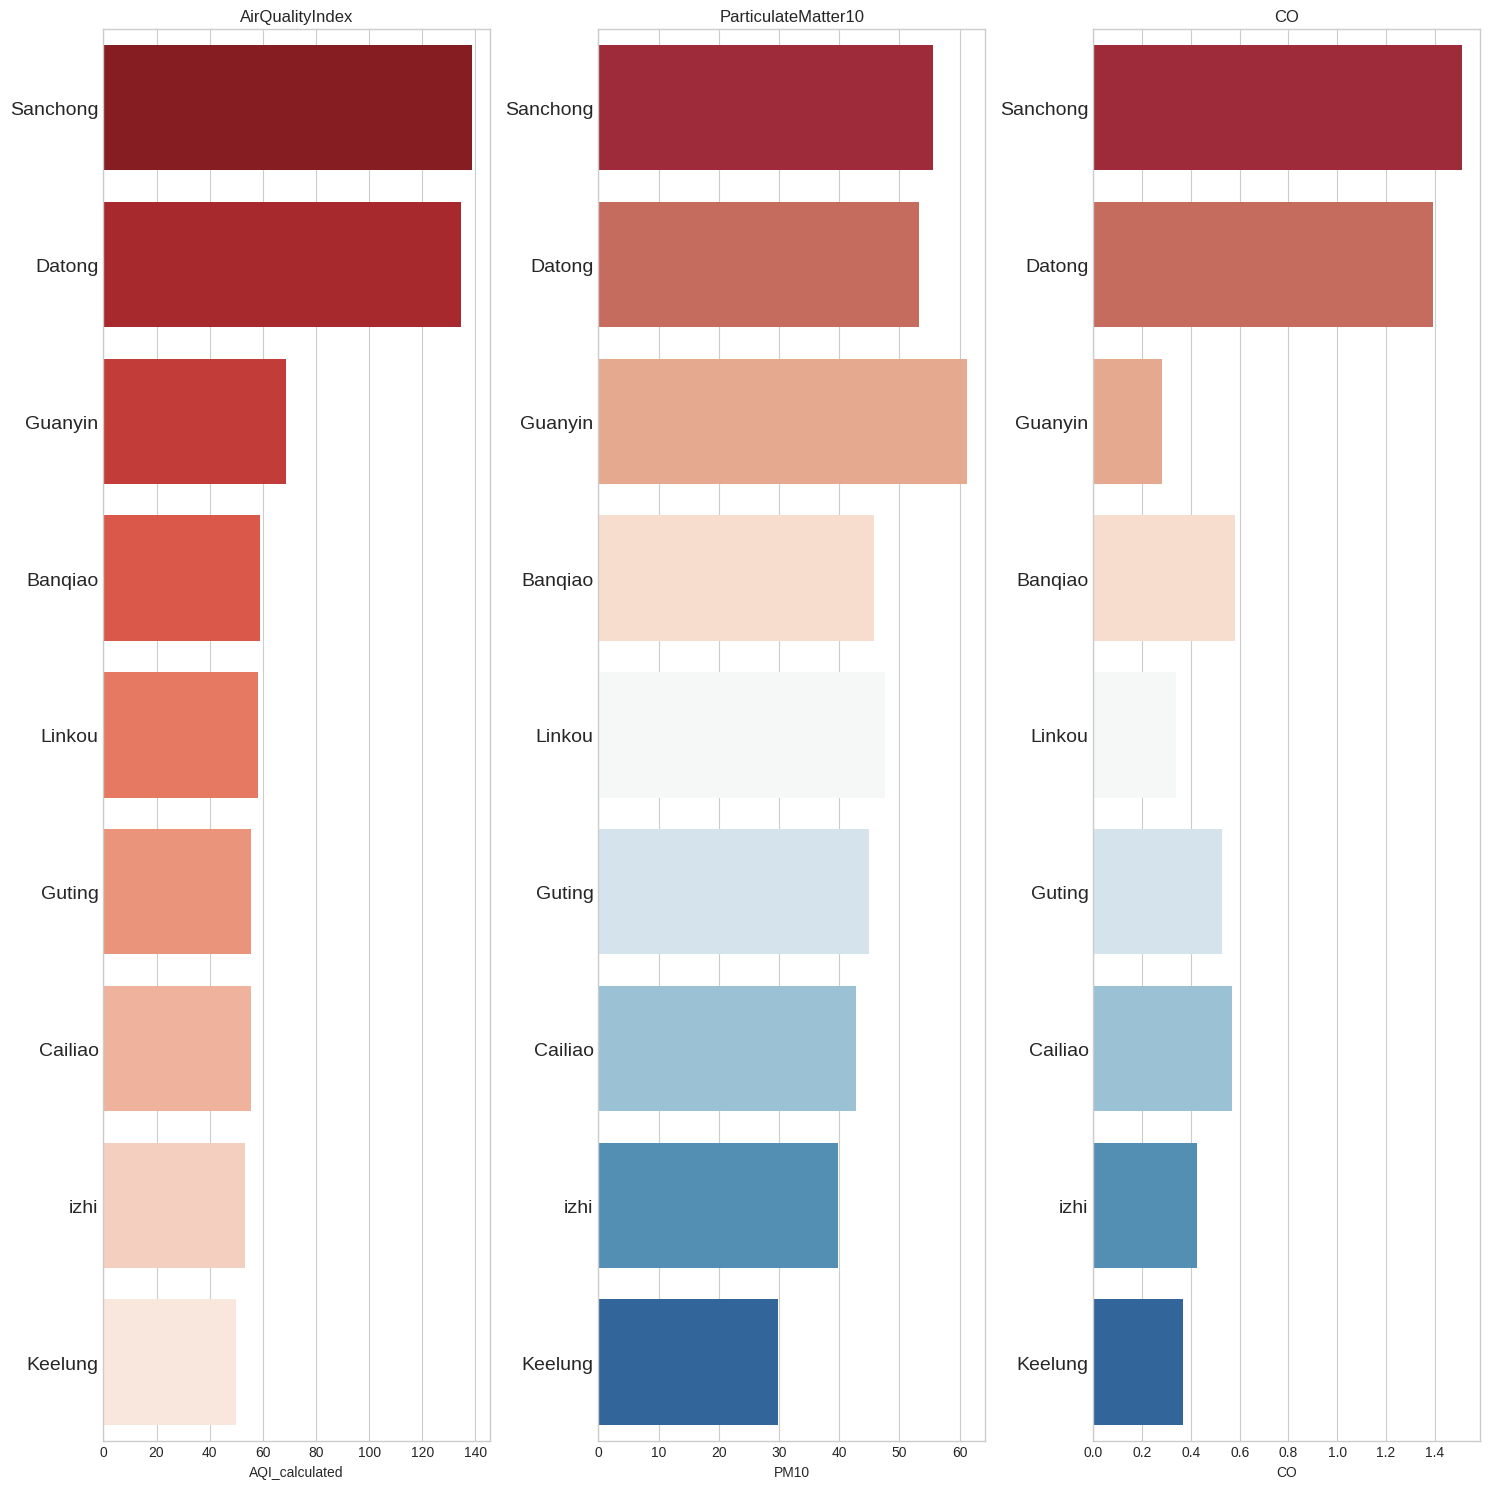

In [ ]:
# 10 station with most pollution
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI_calculated[:10],
                   y = most_polluted.index[:10],
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10[:10],
                   y = most_polluted.index[:10],
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO[:10],
                   y = most_polluted.index[:10],
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

In [ ]:
# Sum of pollution
import plotly.express as px

df = dataset_2.drop(columns = ['hour','day','month', 'Date','Checks','O3_SubIndex', 'O3_8hr_max',
                               'NOx_SubIndex','NOx_24hr_avg','PM2.5_24hr_avg','PM2.5_SubIndex',
                               'PM10_SubIndex','SO2_24hr_avg','SO2_SubIndex','PM10_24hr_avg','CO_8hr_max','CO_SubIndex',
                               'AQI_bucket_calculated', 'AQI_calculated']).groupby('station').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'station'), path=['station','variable'],
                 values=pd.melt(df, id_vars = 'station')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

# Preprocessing Data

## Dataset 1 - City Day

#### Delete all rows in which AQI bucket column is null

In [ ]:
dataset_1.dropna(subset=['AQI', 'AQI_Bucket'], inplace=True)

#### Keep only necessary features

In [ ]:
# unncessary_features = ['StationId', 'Date', 'AQI', 'NO', 'Benzene', 'Toluene', 'Xylene', 'NH3', 'NO2']
unncessary_features = ['Date', 'AQI', 'City']
dataset_1 = dataset_1.drop(columns=unncessary_features)

In [ ]:
dataset_1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
4373,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,Satisfactory
4374,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,Moderate
4375,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,Moderate
4376,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,Moderate
4377,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,Poor


In [ ]:
dataset_1.reset_index(drop=True, inplace=True)


In [ ]:
dataset_1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,NaN,Satisfactory
1,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,NaN,Moderate
2,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,NaN,Moderate
3,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,NaN,Moderate
4,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,NaN,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,Moderate
5789,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,Moderate
5790,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,Poor
5791,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,Moderate


#### Preparing data for training and testing

Divide dataset into X and y

In [ ]:
X = dataset_1.drop(columns=['AQI_Bucket'])
y = dataset_1['AQI_Bucket']

In [ ]:
y.unique()

array(['Satisfactory', 'Moderate', 'Poor', 'Good', 'Very Poor', 'Severe'],
      dtype=object)

Training and testing split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train_.head(20)

4201       Very Poor
387         Moderate
4385        Moderate
5775        Moderate
2348    Satisfactory
1557    Satisfactory
4620          Severe
2778    Satisfactory
2117            Poor
2960        Moderate
1410        Moderate
3560        Moderate
677     Satisfactory
4374        Moderate
5641            Poor
5621       Very Poor
61      Satisfactory
1835    Satisfactory
3891       Very Poor
2245        Moderate
Name: AQI_Bucket, dtype: object

Label encoding the target variable

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the training set
label_encoder.fit(y_train_)

# Transform both the training and testing sets
y_train_encoded = label_encoder.transform(y_train_)
y_test_encoded = label_encoder.transform(y_test_)
y_train_encoded = pd.Series(y_train_encoded)
y_test_encoded = pd.Series(y_test_encoded)

In [ ]:
y_train_encoded.head(20)

0     5
1     1
2     1
3     1
4     3
5     3
6     4
7     3
8     2
9     1
10    1
11    1
12    3
13    1
14    2
15    5
16    3
17    3
18    5
19    1
dtype: int64

#### Handle missing/nan values and scale data

In [ ]:
missing_values(X_train_)

The dataset has total of: 12 columns.
Columns that have missing values: 12 columns


,Missing values,Missing percentage (%)
Xylene,3660,79.000000
PM10,1559,33.600000
NH3,494,10.700000
Benzene,344,7.400000
Toluene,207,4.500000
O3,167,3.600000
SO2,88,1.900000
PM2.5,47,1.000000
CO,12,0.300000
NOx,8,0.200000


Fill in missing values

In [ ]:
# Take columns of dataset
dataset_1_columns = dataset_1.columns
# Excluding the y column
dataset_1_columns = dataset_1_columns[:-1]

dataset_1_columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

In [ ]:
X_train_.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
4201,146.03,296.27,41.52,79.43,102.77,35.09,1.56,26.86,117.20,6.50,12.45,NaN
387,31.68,159.23,4.37,19.05,12.52,20.63,1.86,2.87,58.82,1.78,1.32,NaN
4385,39.51,185.99,30.79,32.96,65.30,27.89,2.15,8.87,91.79,1.43,4.52,NaN
5775,71.08,150.28,8.19,26.01,22.01,40.00,1.04,13.57,38.86,2.42,23.32,1.71
2348,32.80,NaN,2.98,11.31,12.63,64.51,1.47,4.76,31.72,2.76,15.67,NaN


In [ ]:
# Take columns of dataset
dataset_1_columns = dataset_1.columns
# Excluding the y column
dataset_1_columns = dataset_1_columns[:-1]


# Fill Missing Values

for column in dataset_1_columns:
    imputer = SimpleImputer(strategy="mean")
    X_train_[column] = imputer.fit_transform(X_train_[[column]])
    X_test_[column] = imputer.transform(X_test_[[column]])

In [ ]:
X_train_.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
4201,146.03,296.270000,41.52,79.43,102.77,35.09,1.56,26.86,117.20,6.50,12.45,1.439825
387,31.68,159.230000,4.37,19.05,12.52,20.63,1.86,2.87,58.82,1.78,1.32,1.439825
4385,39.51,185.990000,30.79,32.96,65.30,27.89,2.15,8.87,91.79,1.43,4.52,1.439825
5775,71.08,150.280000,8.19,26.01,22.01,40.00,1.04,13.57,38.86,2.42,23.32,1.710000
2348,32.80,156.688741,2.98,11.31,12.63,64.51,1.47,4.76,31.72,2.76,15.67,1.439825


#### Apply scaling


In [ ]:
dataset_1_columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

In [ ]:
# 3. Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test_)

In [ ]:
# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_.columns)

In [ ]:
X_train_scaled_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.211091,0.371622,0.186154,0.476790,0.403336,0.099053,0.032453,0.368911,0.450840,0.016587,0.030254,0.061795
1,0.043824,0.199606,0.017727,0.096492,0.049137,0.058060,0.038694,0.030213,0.222704,0.004542,0.003208,0.061795
2,0.055278,0.233196,0.137507,0.184103,0.256279,0.078641,0.044726,0.114923,0.351544,0.003649,0.010984,0.061795
3,0.101457,0.188372,0.035046,0.140329,0.086381,0.112973,0.021635,0.181279,0.144705,0.006175,0.056668,0.073391
4,0.045463,0.196416,0.011425,0.047742,0.049568,0.182457,0.030580,0.056897,0.116803,0.007043,0.038078,0.061795


In [ ]:
y_test_encoded

0       0
1       3
2       3
3       3
4       3
       ..
1154    1
1155    3
1156    1
1157    1
1158    1
Length: 1159, dtype: int64

In [ ]:
# create dataset for training
# time step: 24h, sliding window: 1

X_train_city_day,y_train_city_day = X_train_scaled_df, y_train_encoded
X_test_city_day,y_test_city_day = X_test_scaled_df, y_test_encoded

Create a dictionary to store original labels and their encoded values

In [ ]:
og_data_city_day= dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [ ]:
X_train_city_day.shape, y_train_city_day.shape, X_test_city_day.shape, y_test_city_day.shape


((4634, 12), (4634,), (1159, 12), (1159,))

## Dataset 2 - Taiwan

Randomly filters data for each station in 2015

In [ ]:

stations = dataset_2['station'].unique()

# Dictionary to store the selected date ranges for each station
station_date_ranges = {}


# Loop through each station
for station in stations:
    # Generate a random day within the selected month
    start_date = pd.Timestamp(year=2015, month=np.random.randint(1, 13), day=np.random.randint(1, 29))  # Random day within the month
    # Generate the end date by expanding from the start date
    end_date = start_date + pd.Timedelta(days=30)
    # Store the date range for the station
    station_date_ranges[station] = (start_date, end_date)


# Create a list to store the filtered DataFrames
filtered_dfs = []

# Loop through each station and its selected date range
for station, date_range in station_date_ranges.items():
    # Filter the original DataFrame for the current station and selected date range
    station_data = dataset_2[(dataset_2['station'] == station) & (dataset_2['Date'] >= date_range[0]) & (dataset_2['Date'] <= date_range[1])]
    # Append the filtered data to the list
    filtered_dfs.append(station_data)

# Concatenate the filtered DataFrames
modified_df = pd.concat(filtered_dfs)

In [ ]:
station_date_ranges

{'Banqiao': (Timestamp('2015-01-02 00:00:00'),
  Timestamp('2015-02-01 00:00:00')),
 'Cailiao': (Timestamp('2015-06-19 00:00:00'),
  Timestamp('2015-07-19 00:00:00')),
 'Datong': (Timestamp('2015-06-12 00:00:00'),
  Timestamp('2015-07-12 00:00:00')),
 'Guanyin': (Timestamp('2015-03-02 00:00:00'),
  Timestamp('2015-04-01 00:00:00')),
 'Guting': (Timestamp('2015-03-01 00:00:00'),
  Timestamp('2015-03-31 00:00:00')),
 'Keelung': (Timestamp('2015-06-03 00:00:00'),
  Timestamp('2015-07-03 00:00:00')),
 'Linkou': (Timestamp('2015-02-11 00:00:00'),
  Timestamp('2015-03-13 00:00:00')),
 'Sanchong': (Timestamp('2015-03-11 00:00:00'),
  Timestamp('2015-04-10 00:00:00')),
 'izhi': (Timestamp('2015-04-20 00:00:00'), Timestamp('2015-05-20 00:00:00'))}

In [ ]:
dataset_2 = modified_df

#### Data analysis

In [ ]:
dataset_2

,month,day,hour,station,AMB_TEMP,CO,NOx,O3,PM10,PM2.5,...,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
24,1,2,0,Banqiao,13.0,0.30,11.0,31.0,42.0,12.0,...,31.0,59.513889,86.458333,5.614583,21.458333,26.0,31.0,6,86.0,Satisfactory
25,1,2,1,Banqiao,13.0,0.26,8.3,35.0,38.0,12.0,...,35.0,55.000000,80.625000,5.119792,21.005208,26.0,35.0,6,81.0,Satisfactory
26,1,2,2,Banqiao,13.0,0.24,6.9,36.0,35.0,17.0,...,36.0,51.180556,75.291667,4.786458,20.635417,26.0,36.0,6,75.0,Satisfactory
27,1,2,3,Banqiao,13.0,0.23,5.5,37.0,37.0,21.0,...,37.0,48.125000,70.708333,4.531250,20.296875,26.0,37.0,6,71.0,Satisfactory
28,1,2,4,Banqiao,13.0,0.25,6.5,35.0,37.0,20.0,...,37.0,45.625000,66.791667,4.333333,20.062500,21.5,37.0,6,67.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71424,5,20,18,izhi,28.0,1.00,56.0,0.9,18.0,8.0,...,76.0,27.500000,31.875000,6.156250,63.958333,53.5,76.0,6,76.0,Satisfactory
71425,5,20,19,izhi,27.0,1.02,70.0,0.1,21.0,12.0,...,50.0,26.944444,30.875000,6.187500,65.416667,53.5,50.0,6,65.0,Satisfactory
71426,5,20,20,izhi,26.0,1.53,98.0,0.0,29.0,17.0,...,39.0,26.736111,30.333333,6.286458,67.864583,76.5,39.0,6,76.0,Satisfactory
71427,5,20,21,izhi,26.0,1.39,84.0,0.0,35.0,15.0,...,20.0,26.180556,30.416667,6.447917,68.854167,76.5,20.0,6,76.0,Satisfactory


In [ ]:
# Show unique station
stations = dataset_2['station'].unique()
print("Number of stations:", len(stations), '\n')

for i in stations:
  print(i)


Number of stations: 9 

Banqiao
Cailiao
Datong
Guanyin
Guting
Keelung
Linkou
Sanchong
izhi


In [ ]:
dataset_2['station'].value_counts()

Keelung     735
Linkou      734
Banqiao     730
Sanchong    730
izhi        728
Datong      722
Guting      721
Cailiao     712
Guanyin     710
Name: station, dtype: int64

In [ ]:
dataset_2['AQI_bucket_calculated'].unique()

array(['Satisfactory', 'Good', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

In [ ]:
value_count = dataset_2['AQI_bucket_calculated'].value_counts()
value_count

Satisfactory    2434
Good            2358
Moderate        1650
Severe            42
Poor              27
Very Poor         11
Name: AQI_bucket_calculated, dtype: int64

In [ ]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6522 entries, 24 to 71428
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  6522 non-null   int64         
 1   day                    6522 non-null   int64         
 2   hour                   6522 non-null   int64         
 3   station                6522 non-null   object        
 4   AMB_TEMP               6522 non-null   float64       
 5   CO                     6522 non-null   float64       
 6   NOx                    6522 non-null   float64       
 7   O3                     6522 non-null   float64       
 8   PM10                   6522 non-null   float64       
 9   PM2.5                  6522 non-null   float64       
 10  RAINFALL               6522 non-null   float64       
 11  SO2                    6522 non-null   float64       
 12  WIND_SPEED             6522 non-null   float64       
 13  D

In [ ]:
dataset_2.describe()

,month,day,hour,AMB_TEMP,CO,NOx,O3,PM10,PM2.5,RAINFALL,...,CO_8hr_max,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated
count,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,...,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000
mean,4.054584,15.569611,11.641061,23.041306,0.706883,35.172524,37.346949,49.816099,20.584988,2.301633,...,1.094854,58.968353,34.285826,49.712301,6.223450,43.301823,48.634679,61.380605,5.996320,79.391751
std,1.894332,8.683207,6.863632,6.340924,0.659099,34.487345,30.031721,128.880464,29.579083,1.866239,...,0.990438,38.175660,29.869987,50.987360,13.130815,33.870808,34.255301,42.667353,0.060555,62.866684
min,1.000000,1.000000,0.000000,0.000000,-0.010000,-1.100000,-0.200000,-22.000000,-18.000000,0.000000,...,0.140000,0.200000,0.000000,9.458333,1.453125,6.572917,7.000000,0.200000,5.000000,15.000000
25%,3.000000,8.000000,6.000000,17.000000,0.320000,13.000000,15.000000,29.000000,10.000000,1.270000,...,0.470000,33.000000,20.225694,30.791667,3.265625,20.614583,23.500000,33.000000,6.000000,44.000000
50%,3.000000,15.000000,12.000000,23.000000,0.470000,23.000000,32.000000,41.000000,17.000000,1.510000,...,0.670000,46.000000,28.680556,42.166667,4.500000,29.294271,33.500000,46.000000,6.000000,62.000000
75%,6.000000,23.000000,18.000000,29.620000,0.820000,42.000000,49.000000,59.000000,27.000000,3.360000,...,1.370000,76.000000,43.333333,58.750000,5.822917,55.544271,68.500000,76.000000,6.000000,105.000000
max,7.000000,31.000000,23.000000,36.000000,5.900000,297.000000,137.000000,5004.000000,787.000000,57.000000,...,5.900000,137.000000,437.307692,858.954167,144.763889,199.333333,148.750000,154.411765,6.000000,859.000000


In [ ]:
missing_values(dataset_2)

The dataset has total of: 30 columns.
Columns that have missing values: 0 columns


,Missing values,Missing percentage (%)


#### Delete all rows in which AQI bucket column is null

In [ ]:
dataset_2.dropna(subset=['AQI_calculated', 'AQI_bucket_calculated'], inplace=True)
dataset_2 = dataset_2[~dataset_2['AQI_bucket_calculated'].isin(['Severe', 'Poor', 'Very Poor'])]


In [ ]:
dataset_2.shape

(6442, 30)

In [ ]:
missing_values(dataset_2)

The dataset has total of: 30 columns.
Columns that have missing values: 0 columns


,Missing values,Missing percentage (%)


In [ ]:
dataset_2.columns

Index(['month', 'day', 'hour', 'station', 'AMB_TEMP', 'CO', 'NOx', 'O3',
       'PM10', 'PM2.5', 'RAINFALL', 'SO2', 'WIND_SPEED', 'Date', 'DayNames',
       'PM10_24hr_avg', 'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg',
       'CO_8hr_max', 'O3_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'Checks',
       'AQI_calculated', 'AQI_bucket_calculated'],
      dtype='object')

#### Keep only necessary features

In [ ]:
dataset_2

,month,day,hour,station,AMB_TEMP,CO,NOx,O3,PM10,PM2.5,...,O3_8hr_max,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
24,1,2,0,Banqiao,13.0,0.30,11.0,31.0,42.0,12.0,...,31.0,59.513889,86.458333,5.614583,21.458333,26.0,31.0,6,86.0,Satisfactory
25,1,2,1,Banqiao,13.0,0.26,8.3,35.0,38.0,12.0,...,35.0,55.000000,80.625000,5.119792,21.005208,26.0,35.0,6,81.0,Satisfactory
26,1,2,2,Banqiao,13.0,0.24,6.9,36.0,35.0,17.0,...,36.0,51.180556,75.291667,4.786458,20.635417,26.0,36.0,6,75.0,Satisfactory
27,1,2,3,Banqiao,13.0,0.23,5.5,37.0,37.0,21.0,...,37.0,48.125000,70.708333,4.531250,20.296875,26.0,37.0,6,71.0,Satisfactory
28,1,2,4,Banqiao,13.0,0.25,6.5,35.0,37.0,20.0,...,37.0,45.625000,66.791667,4.333333,20.062500,21.5,37.0,6,67.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71424,5,20,18,izhi,28.0,1.00,56.0,0.9,18.0,8.0,...,76.0,27.500000,31.875000,6.156250,63.958333,53.5,76.0,6,76.0,Satisfactory
71425,5,20,19,izhi,27.0,1.02,70.0,0.1,21.0,12.0,...,50.0,26.944444,30.875000,6.187500,65.416667,53.5,50.0,6,65.0,Satisfactory
71426,5,20,20,izhi,26.0,1.53,98.0,0.0,29.0,17.0,...,39.0,26.736111,30.333333,6.286458,67.864583,76.5,39.0,6,76.0,Satisfactory
71427,5,20,21,izhi,26.0,1.39,84.0,0.0,35.0,15.0,...,20.0,26.180556,30.416667,6.447917,68.854167,76.5,20.0,6,76.0,Satisfactory


In [ ]:
unncessary_features = ['month', 'day', 'hour', 'station', 'AMB_TEMP',
       'RAINFALL', 'WIND_SPEED',
       'Date', 'DayNames', 'PM10_24hr_avg', 'PM2.5_24hr_avg', 'SO2_24hr_avg',
       'NOx_24hr_avg', 'CO_8hr_max', 'O3_8hr_max', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'CO_SubIndex',
       'O3_SubIndex', 'Checks', 'AQI_calculated']
dataset_2 = dataset_2.drop(columns=unncessary_features)

#### Preparing data for training and testing

Divide dataset into X and y

In [ ]:
X = dataset_2.drop(columns=['AQI_bucket_calculated'])
y = dataset_2['AQI_bucket_calculated']

In [ ]:
y.unique()

array(['Satisfactory', 'Good', 'Moderate'], dtype=object)

Training and testing sets split

In [ ]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

Label Encoding the output variable

In [ ]:
# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y_train_ = label_encoder.fit_transform(y_train_)
y_test_= label_encoder.transform(y_test_)

# Transform both the training and testing sets into Series
y_train_taiwan = pd.Series(y_train_)
y_test_taiwan= pd.Series(y_test_)

In [ ]:
y_train_

array([2, 2, 2, ..., 1, 1, 2])

In [ ]:
y_train_

array([2, 2, 2, ..., 1, 1, 2])

Create a dictionary to store original labels and their encoded values

In [ ]:
og_data_taiwan = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [ ]:
og_data_taiwan

{0: 'Good', 1: 'Moderate', 2: 'Satisfactory'}

#### Scale data using MinMaxScaler

In [ ]:
# 3. Scale Features
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

In [ ]:
# Convert scaled arrays back to DataFrames
X_train_taiwan = pd.DataFrame(X_train_, columns=X.columns)
X_test_taiwan = pd.DataFrame(X_test_, columns=X.columns)

In [ ]:
X_train_taiwan

,CO,NOx,O3,PM10,PM2.5,SO2
0,0.044776,0.032875,0.518950,0.335749,0.076730,0.025754
1,0.039179,0.035894,0.329446,0.268116,0.149686,0.012249
2,0.065299,0.074136,0.249271,0.173913,0.056604,0.009422
3,0.041045,0.047300,0.424198,0.115942,0.037736,0.002827
4,0.087687,0.090909,0.205539,0.265700,0.080503,0.015075
...,...,...,...,...,...,...
5148,0.042910,0.037236,0.395044,0.120773,0.049057,0.010992
5149,0.190299,0.198256,0.278426,0.183575,0.036478,0.009422
5150,0.324627,0.423012,0.241983,0.137681,0.025157,0.011307
5151,0.565299,0.560550,0.373178,0.214976,0.054088,0.015075


# Building models

## 1. Feed Forward Neural Network (FNN)

Build the model

In [ ]:
X_train_city_day = X_train_city_day.values
y_train_city_day = y_train_city_day.values
X_test_city_day = X_test_city_day.values
y_test_city_day = y_test_city_day.values
X_train_taiwan = X_train_taiwan.values
y_train_taiwan = y_train_taiwan.values
X_test_taiwan = X_test_taiwan.values
y_test_taiwan = y_test_taiwan.values


In [ ]:
shape_1 = (X_train_city_day.shape[1],)
shape_2 = (X_train_taiwan.shape[1],)

In [ ]:
input_shape = shape_2 #@param ["shape_1", "shape_2"] {type:"raw"}

In [ ]:
num_classes_1 = 6
num_classes_2 = 3

In [ ]:
num_classes = num_classes_2 #@param ["num_classes_1", "num_classes_2"] {type:"raw"}

In [ ]:
num_classes

3

In [ ]:
input_shape

(6,)

In [ ]:
import tensorflow as tf
from keras import regularizers
MLP_model = tf.keras.models.Sequential([
    #tf.keras.layers.Input(shape=(100,7)),
    tf.keras.layers.Dense(512, activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.125),

    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.125),

    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.125),

    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.125),


    tf.keras.layers.Flatten(),  # Add Flatten layer to flatten the output
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


Compiling the model

In [ ]:
# Compiling the model
MLP_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Summary

In [ ]:
MLP_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3584      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

## 2. LSTM Model

Reshape city day dataset into LSTM input shape

In [ ]:
import numpy as np

# Define the number of time steps
time_steps = 1

# Reshape X_train_taiwan for LSTM with 24 time steps
num_samples_train = X_train_city_day.shape[0] - time_steps + 1
X_train_city_day_LSTM = np.array([X_train_city_day[i:i + time_steps] for i in range(num_samples_train)])
y_train_city_day_LSTM = y_train_city_day[time_steps - 1:]

# Reshape X_test_taiwan for LSTM with 24 time steps
num_samples_test = X_test_city_day.shape[0] - time_steps + 1
X_test_city_day_LSTM = np.array([X_test_city_day[i:i + time_steps] for i in range(num_samples_test)])
y_test_city_day_LSTM = y_test_city_day[time_steps - 1:]

print(X_train_city_day_LSTM.shape, X_test_city_day_LSTM.shape)
print(y_train_city_day_LSTM.shape, y_test_city_day_LSTM.shape)


(4634, 1, 12) (1159, 1, 12)
(4634,) (1159,)


Reshape Taiwan dataset into LSTM input shape

In [ ]:
import numpy as np

# Define the number of time steps
time_steps = 24

# Reshape X_train_taiwan for LSTM with 24 time steps
num_samples_train = X_train_taiwan.shape[0] - time_steps + 1
X_train_taiwan_LSTM = np.array([X_train_taiwan[i:i + time_steps] for i in range(num_samples_train)])
y_train_taiwan_LSTM = y_train_taiwan[time_steps - 1:]

# Reshape X_test_taiwan for LSTM with 24 time steps
num_samples_test = X_test_taiwan.shape[0] - time_steps + 1
X_test_taiwan_LSTM = np.array([X_test_taiwan[i:i + time_steps] for i in range(num_samples_test)])
y_test_taiwan_LSTM = y_test_taiwan[time_steps - 1:]

print(X_train_taiwan_LSTM.shape, X_test_taiwan_LSTM.shape)
print(y_train_taiwan_LSTM.shape, y_test_taiwan_LSTM.shape)


(5130, 24, 6) (1266, 24, 6)
(5130,) (1266,)


In [ ]:
X_train_taiwan_LSTM[0].shape

(24, 6)

In [ ]:
shape_2 = (X_train_taiwan_LSTM.shape[1], X_train_taiwan_LSTM.shape[2])
shape_1 = (X_train_city_day_LSTM.shape[1], X_train_city_day_LSTM.shape[2])


In [ ]:
input_shape = shape_2 #@param ["shape_1", "shape_2"] {type: 'raw'}

In [ ]:
num_classes

3

In [ ]:
num_classes = num_classes_2 #@param ["num_classes_1", "num_classes_2"] {type:"raw"}

In [ ]:
input_shape

(24, 6)

In [ ]:
LSTM_model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
    #BatchNormalization(),
    Dropout(0.2),

    LSTM(units=64, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)),
    #BatchNormalization(),
    Dropout(0.2),

    Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #BatchNormalization(),
    Dropout(0.2),

    Dense(units=num_classes, activation='softmax')
])

Compiling the model

In [ ]:
# Compiling the model

LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Summary

In [ ]:
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           69120     
                                                                 
 dropout_4 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                

## 3. Bidirectional LSTM Model

Model architecture

In [ ]:
X_train_city_day_BLSTM = X_train_city_day_LSTM
X_test_city_day_BLSTM = X_test_city_day_LSTM
y_train_city_day_BLSTM = y_train_city_day_LSTM
y_test_city_day_BLSTM = y_test_city_day_LSTM


In [ ]:

X_train_taiwan_BLSTM = X_train_taiwan_LSTM
X_test_taiwan_BLSTM = X_test_taiwan_LSTM
y_train_taiwan_BLSTM = y_train_taiwan_LSTM
y_test_taiwan_BLSTM = y_test_taiwan_LSTM

In [ ]:
shape_1 = (X_train_city_day_BLSTM.shape[1], X_train_city_day_BLSTM.shape[2])
shape_2 = (X_train_taiwan_BLSTM.shape[1], X_train_taiwan_BLSTM.shape[2])

In [ ]:
input_shape = shape_2 #@param ["shape_1", "shape_2"] {type:"raw"}

In [ ]:
input_shape

(24, 6)

In [ ]:
num_classes = num_classes_2 #@param ["num_classes_1", "num_classes_2"] {type:"raw"}

In [ ]:
BLSTM_model = Sequential([
    Bidirectional(LSTM(units=256, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)), input_shape=input_shape),
    #BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(units=128, return_sequences=False, kernel_regularizer=regularizers.l2(0.001))),
    #BatchNormalization(),
    Dropout(0.2),

    Dense(units=64, activation='relu'),
    #BatchNormalization(),
    Dropout(0.2),

    # Dense(units=32, activation='relu'),
    # #BatchNormalization(),
    # Dropout(0.2),

    Dense(units=num_classes, activation='softmax')
])

In [ ]:
BLSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
BLSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 24, 512)           538624    
 al)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dropout_9 (Dropout)         (None, 64)               

## 4. GRU

In [ ]:
X_train_city_day_GRU = X_train_city_day_LSTM
X_test_city_day_GRU = X_test_city_day_LSTM
y_train_city_day_GRU = y_train_city_day_LSTM
y_test_city_day_GRU = y_test_city_day_LSTM


In [ ]:
X_train_taiwan_GRU = X_train_taiwan_LSTM
X_test_taiwan_GRU = X_test_taiwan_LSTM
y_train_taiwan_GRU = y_train_taiwan_LSTM
y_test_taiwan_GRU = y_test_taiwan_LSTM



In [ ]:
shape_1 = (X_train_city_day_GRU.shape[1], X_train_city_day_GRU.shape[2])
shape_2 = (X_train_taiwan_GRU.shape[1], X_train_taiwan_GRU.shape[2])

In [ ]:
input_shape = shape_2 #@param ["shape_1", "shape_2"] {type:"raw"}

In [ ]:
input_shape

(24, 6)

In [ ]:
num_classes = num_classes_2 #@param ["num_classes_1", "num_classes_2"] {type:"raw"}

In [ ]:
GRU_model = Sequential([
    GRU(256, return_sequences=True, input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    GRU(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

In [ ]:
GRU_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
GRU_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           202752    
                                                                 
 batch_normalization (Batch  (None, 24, 256)           1024      
 Normalization)                                                  
                                                                 
 dropout_10 (Dropout)        (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 128)              

## 5. MLP Auto Encoder

In [ ]:
X_train_city_day_auto = X_train_city_day
y_train_city_day_auto = y_train_city_day
X_test_city_day_auto = X_test_city_day
y_test_city_day_auto = y_test_city_day


In [ ]:
X_train_taiwan_auto = X_train_taiwan
y_train_taiwan_auto = y_train_taiwan
X_test_taiwan_auto = X_test_taiwan
y_test_taiwan_auto = y_test_taiwan


In [ ]:

# y_train_city_day_auto = to_categorical(y_train_city_day_auto)
# y_test_city_day_auto = to_categorical(y_test_city_day_auto)


# y_train_taiwan_auto = to_categorical(y_train_taiwan_auto)
# y_test_taiwany_auto = to_categorical(y_test_taiwan_auto)



In [ ]:
shape_1 = (X_train_city_day_auto.shape[1])
shape_2 = (X_train_taiwan_auto.shape[1])

In [ ]:
input_dim = shape_2 #@param ["shape_1", "shape_2"] {type:"raw"}
input_shape = (input_dim,)

In [ ]:
input_shape

(6,)

In [ ]:
num_classes = num_classes_2 #@param ["num_classes_1", "num_classes_2"] {type:"raw"}

In [ ]:
y_train_city_day_auto.shape

(4634,)

In [ ]:
y_train_city_day_auto_ver2 = y_train_city_day_auto - 1

In [ ]:
# Define the encoder architecture
encoder_input = Input(shape=input_shape)
encoded = Dense(256, activation='relu')(encoder_input)
encoded = Dense(128, activation='relu')(encoded)

# Define the decoder architecture
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Build the autoencoder model
autoencoder = Model(encoder_input, decoded)



In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_84 (Dense)            (None, 256)               1792      
                                                                 
 dense_85 (Dense)            (None, 128)               32896     
                                                                 
 dense_86 (Dense)            (None, 256)               33024     
                                                                 
 dense_87 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 69254 (270.52 KB)
Trainable params: 69254 (270.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training models

## Feed Forward Neural Network (FNN)

In [ ]:
MLP_model_city_day = MLP_model


Train MLP model (station_day dataset)

In [ ]:
MLP_history_city_day = MLP_model_city_day.fit(X_train_city_day, y_train_city_day, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
116/116 [==============================] - 2s 6ms/step - loss: 1.1703 - accuracy: 0.5080 - val_loss: 0.7979 - val_accuracy: 0.6872
Epoch 2/100
116/116 [==============================] - 1s 5ms/step - loss: 0.8089 - accuracy: 0.6836 - val_loss: 0.6973 - val_accuracy: 0.7400
Epoch 3/100
116/116 [==============================] - 1s 6ms/step - loss: 0.7686 - accuracy: 0.6971 - val_loss: 0.6814 - val_accuracy: 0.7303
Epoch 4/100
116/116 [==============================] - 1s 6ms/step - loss: 0.7529 - accuracy: 0.7025 - val_loss: 0.6713 - val_accuracy: 0.7325
Epoch 5/100
116/116 [==============================] - 1s 6ms/step - loss: 0.7188 - accuracy: 0.7265 - val_loss: 0.6491 - val_accuracy: 0.7519
Epoch 6/100
116/116 [==============================] - 1s 6ms/step - loss: 0.7166 - accuracy: 0.7200 - val_loss: 0.6692 - val_accuracy: 0.7476
Epoch 7/100
116/116 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.7259 - val_loss: 0.6711 - val_accuracy: 0.7271

Save MLP model (station_day dataset)

In [ ]:
MLP_model_city_day.save('MLP_model_city_day.h5')

Train MLP model (taiwan dataset)

In [ ]:
MLP_model_taiwan = MLP_model

In [ ]:
MLP_history_taiwan = MLP_model_taiwan.fit(X_train_taiwan, y_train_taiwan, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
120/120 [==============================] - 3s 9ms/step - loss: 0.7121 - accuracy: 0.7049 - val_loss: 0.5391 - val_accuracy: 0.7800
Epoch 2/100
120/120 [==============================] - 1s 4ms/step - loss: 0.5965 - accuracy: 0.7536 - val_loss: 0.5776 - val_accuracy: 0.7435
Epoch 3/100
120/120 [==============================] - 1s 4ms/step - loss: 0.5819 - accuracy: 0.7536 - val_loss: 0.5238 - val_accuracy: 0.7842
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7560 - val_loss: 0.5191 - val_accuracy: 0.7873
Epoch 5/100
120/120 [==============================] - 1s 4ms/step - loss: 0.5677 - accuracy: 0.7654 - val_loss: 0.5273 - val_accuracy: 0.7956
Epoch 6/100
120/120 [==============================] - 1s 4ms/step - loss: 0.5637 - accuracy: 0.7586 - val_loss: 0.5194 - val_accuracy: 0.7873
Epoch 7/100
120/120 [==============================] - 1s 4ms/step - loss: 0.5623 - accuracy: 0.7654 - val_loss: 0.5059 - val_accuracy: 0.7935

Save MLP model (taiwan dataset)

In [ ]:
MLP_model_taiwan.save('MLP_model_taiwan.h5')

## LSTM Model

In [ ]:
LSTM_model_city_day = LSTM_model


Train LSTM model (station_day dataset)

In [ ]:
LSTM_history_city_day = LSTM_model_city_day.fit(X_train_city_day_LSTM, y_train_city_day_LSTM, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
116/116 [==============================] - 6s 13ms/step - loss: 1.6833 - accuracy: 0.3545 - val_loss: 1.4434 - val_accuracy: 0.3927
Epoch 2/100
116/116 [==============================] - 1s 7ms/step - loss: 1.3261 - accuracy: 0.4033 - val_loss: 1.1715 - val_accuracy: 0.4854
Epoch 3/100
116/116 [==============================] - 1s 6ms/step - loss: 1.1354 - accuracy: 0.5352 - val_loss: 1.0041 - val_accuracy: 0.6203
Epoch 4/100
116/116 [==============================] - 1s 6ms/step - loss: 1.0119 - accuracy: 0.6234 - val_loss: 0.9098 - val_accuracy: 0.6947
Epoch 5/100
116/116 [==============================] - 1s 6ms/step - loss: 0.9368 - accuracy: 0.6690 - val_loss: 0.8589 - val_accuracy: 0.7141
Epoch 6/100
116/116 [==============================] - 1s 6ms/step - loss: 0.9192 - accuracy: 0.6731 - val_loss: 0.8417 - val_accuracy: 0.7141
Epoch 7/100
116/116 [==============================] - 1s 7ms/step - loss: 0.9060 - accuracy: 0.6776 - val_loss: 0.8546 - val_accuracy: 0.703

Save MLP model (station_day dataset)

In [ ]:
LSTM_model_city_day.save('LSTM_model_city_day.h5')

Train LSTM model (taiwan datasete)

In [ ]:
LSTM_model_taiwan = LSTM_model

In [ ]:
LSTM_history_taiwan = LSTM_model_taiwan.fit(X_train_taiwan_LSTM, y_train_taiwan_LSTM, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
120/120 [==============================] - 6s 14ms/step - loss: 1.1768 - accuracy: 0.4645 - val_loss: 1.1216 - val_accuracy: 0.4471
Epoch 2/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0996 - accuracy: 0.4663 - val_loss: 1.0972 - val_accuracy: 0.4471
Epoch 3/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0832 - accuracy: 0.4663 - val_loss: 1.0841 - val_accuracy: 0.4471
Epoch 4/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0422 - accuracy: 0.4907 - val_loss: 0.8389 - val_accuracy: 0.6691
Epoch 5/100
120/120 [==============================] - 1s 9ms/step - loss: 0.7633 - accuracy: 0.6775 - val_loss: 0.6197 - val_accuracy: 0.7717
Epoch 6/100
120/120 [==============================] - 1s 10ms/step - loss: 0.7052 - accuracy: 0.7079 - val_loss: 0.6527 - val_accuracy: 0.7518
Epoch 7/100
120/120 [==============================] - 1s 11ms/step - loss: 0.6865 - accuracy: 0.7134 - val_loss: 0.6179 - val_accuracy: 0.7

Save LSTM model (taiwan dataset)

In [ ]:
LSTM_model_taiwan.save('LSTM_model_taiwan.h5')

## Bidirectional LSTM Model

In [ ]:
BLSTM_model_city_day = BLSTM_model


Train BLSTM model (station_day dataset)

In [ ]:
BLSTM_history_city_day = BLSTM_model_city_day.fit(X_train_city_day_BLSTM, y_train_city_day_BLSTM, epochs=80, batch_size=32, validation_split=0.2)

Epoch 1/80
116/116 [==============================] - 8s 20ms/step - loss: 1.6613 - accuracy: 0.4044 - val_loss: 1.1373 - val_accuracy: 0.5858
Epoch 2/80
116/116 [==============================] - 1s 10ms/step - loss: 1.0194 - accuracy: 0.5902 - val_loss: 0.8977 - val_accuracy: 0.6904
Epoch 3/80
116/116 [==============================] - 1s 12ms/step - loss: 0.8946 - accuracy: 0.6774 - val_loss: 0.8199 - val_accuracy: 0.7001
Epoch 4/80
116/116 [==============================] - 1s 12ms/step - loss: 0.8598 - accuracy: 0.6892 - val_loss: 0.8021 - val_accuracy: 0.6936
Epoch 5/80
116/116 [==============================] - 1s 13ms/step - loss: 0.8389 - accuracy: 0.6938 - val_loss: 0.8039 - val_accuracy: 0.6969
Epoch 6/80
116/116 [==============================] - 1s 12ms/step - loss: 0.8210 - accuracy: 0.7027 - val_loss: 0.7526 - val_accuracy: 0.7206
Epoch 7/80
116/116 [==============================] - 1s 9ms/step - loss: 0.8143 - accuracy: 0.7052 - val_loss: 0.7476 - val_accuracy: 0.7217


Save BLSTM model (station_day dataset)

In [ ]:
BLSTM_model_city_day.save('BLSTM_model_city_day.h5')

Train BLSTM model (taiwan dataset)

In [ ]:
BLSTM_model_taiwan = BLSTM_model

In [ ]:
X_train_taiwan_BLSTM.shape

(9903, 24, 6)

In [ ]:
BLSTM_history_taiwan = BLSTM_model_taiwan.fit(X_train_taiwan_BLSTM, y_train_taiwan_BLSTM, epochs=80, batch_size=32, validation_split=0.2)

Epoch 1/80
120/120 [==============================] - 13s 23ms/step - loss: 1.3112 - accuracy: 0.4564 - val_loss: 1.1116 - val_accuracy: 0.4471
Epoch 2/80
120/120 [==============================] - 1s 11ms/step - loss: 1.0586 - accuracy: 0.4847 - val_loss: 0.9361 - val_accuracy: 0.5686
Epoch 3/80
120/120 [==============================] - 1s 11ms/step - loss: 0.9114 - accuracy: 0.5868 - val_loss: 0.8071 - val_accuracy: 0.6597
Epoch 4/80
120/120 [==============================] - 1s 11ms/step - loss: 0.7976 - accuracy: 0.6513 - val_loss: 0.7949 - val_accuracy: 0.6649
Epoch 5/80
120/120 [==============================] - 1s 11ms/step - loss: 0.7078 - accuracy: 0.7013 - val_loss: 0.6440 - val_accuracy: 0.6932
Epoch 6/80
120/120 [==============================] - 2s 15ms/step - loss: 0.6639 - accuracy: 0.7325 - val_loss: 0.6129 - val_accuracy: 0.7675
Epoch 7/80
120/120 [==============================] - 2s 16ms/step - loss: 0.6592 - accuracy: 0.7320 - val_loss: 0.5758 - val_accuracy: 0.764

Save BLSTM model (taiwan dataset)

In [ ]:
BLSTM_model_taiwan.save('BLSTM_model_taiwan.h5')

## GRU

In [ ]:
GRU_model_city_day = GRU_model


Train model (city day dataset)

In [ ]:
GRU_history_city_day = GRU_model_city_day.fit(X_train_city_day_GRU, y_train_city_day_GRU, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
116/116 [==============================] - 8s 16ms/step - loss: 1.8128 - accuracy: 0.5179 - val_loss: 2.0398 - val_accuracy: 0.3215
Epoch 2/50
116/116 [==============================] - 1s 9ms/step - loss: 1.3575 - accuracy: 0.6385 - val_loss: 2.0734 - val_accuracy: 0.3215
Epoch 3/50
116/116 [==============================] - 1s 9ms/step - loss: 1.2407 - accuracy: 0.6577 - val_loss: 2.0428 - val_accuracy: 0.3215
Epoch 4/50
116/116 [==============================] - 1s 10ms/step - loss: 1.1713 - accuracy: 0.6747 - val_loss: 1.6146 - val_accuracy: 0.3679
Epoch 5/50
116/116 [==============================] - 1s 10ms/step - loss: 1.1308 - accuracy: 0.6784 - val_loss: 1.2722 - val_accuracy: 0.5383
Epoch 6/50
116/116 [==============================] - 1s 12ms/step - loss: 1.0690 - accuracy: 0.6841 - val_loss: 1.0516 - val_accuracy: 0.6483
Epoch 7/50
116/116 [==============================] - 1s 13ms/step - loss: 1.0496 - accuracy: 0.6863 - val_loss: 0.9283 - val_accuracy: 0.7292
E

Save model (city day dataset)

In [ ]:
GRU_model_city_day.save('GRU_model_city_day.h5')

Train model (taiwan dataset)

In [ ]:
GRU_model_taiwan = GRU_model

In [ ]:
GRU_history_taiwan = GRU_model_taiwan.fit(X_train_taiwan_GRU, y_train_taiwan_GRU, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
120/120 [==============================] - 9s 17ms/step - loss: 1.3961 - accuracy: 0.5892 - val_loss: 1.4708 - val_accuracy: 0.2806
Epoch 2/50
120/120 [==============================] - 2s 13ms/step - loss: 1.0642 - accuracy: 0.6948 - val_loss: 1.4178 - val_accuracy: 0.3225
Epoch 3/50
120/120 [==============================] - 2s 16ms/step - loss: 0.9765 - accuracy: 0.7160 - val_loss: 1.1214 - val_accuracy: 0.5518
Epoch 4/50
120/120 [==============================] - 1s 11ms/step - loss: 0.9249 - accuracy: 0.7226 - val_loss: 0.9628 - val_accuracy: 0.6356
Epoch 5/50
120/120 [==============================] - 1s 10ms/step - loss: 0.8942 - accuracy: 0.7236 - val_loss: 0.8303 - val_accuracy: 0.7361
Epoch 6/50
120/120 [==============================] - 1s 10ms/step - loss: 0.8445 - accuracy: 0.7333 - val_loss: 0.8534 - val_accuracy: 0.6827
Epoch 7/50
120/120 [==============================] - 1s 10ms/step - loss: 0.8285 - accuracy: 0.7443 - val_loss: 0.8120 - val_accuracy: 0.7382

Save model (taiwan dataset)

In [ ]:
GRU_model_taiwan.save('GRU_model_taiwan.h5')

## MLP AutoEncoder

In [ ]:
MLP_Auto_city_day = autoencoder

City_day

Train the auto encoder  (city day)

In [ ]:
MLP_Auto_city_day.fit(X_train_city_day_auto, X_train_city_day_auto, epochs=80, batch_size=32, validation_split=0.2)

Epoch 1/80
116/116 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.2468 - val_loss: 0.0072 - val_accuracy: 0.3528
Epoch 2/80
116/116 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.5252 - val_loss: 0.0021 - val_accuracy: 0.6472
Epoch 3/80
116/116 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.8104 - val_loss: 0.0011 - val_accuracy: 0.8479
Epoch 4/80
116/116 [==============================] - 0s 3ms/step - loss: 7.3130e-04 - accuracy: 0.8821 - val_loss: 6.3085e-04 - val_accuracy: 0.8803
Epoch 5/80
116/116 [==============================] - 0s 3ms/step - loss: 4.3703e-04 - accuracy: 0.9177 - val_loss: 4.3640e-04 - val_accuracy: 0.9266
Epoch 6/80
116/116 [==============================] - 0s 3ms/step - loss: 2.9552e-04 - accuracy: 0.9274 - val_loss: 3.4637e-04 - val_accuracy: 0.9461
Epoch 7/80
116/116 [==============================] - 0s 3ms/step - loss: 2.3199e-04 - accuracy: 0.9361 - val_loss: 2.7167e-

In [ ]:
encoder_city_day = Model(inputs=encoder_input, outputs=MLP_Auto_city_day.layers[2].output)

In [ ]:

# Freeze the weights of the encoder
for layer in encoder_city_day.layers:
    layer.trainable = False

# Define classification layers on top of the encoder
classification_output = Dense(num_classes, activation='softmax')(encoder_city_day.output)

# Build the classification model
city_day_classification_model = Model(inputs=encoder_city_day.input, outputs=classification_output)

# Compile the classification model
city_day_classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classification model using encoded features (X_train_encoded) and class labels (y_train)
history_city_day_auto = city_day_classification_model.fit(X_train_city_day_auto, y_train_city_day_auto, epochs=80, batch_size=32, validation_data=(X_test_city_day_auto, y_test_city_day_auto))

Epoch 1/80
145/145 [==============================] - 1s 3ms/step - loss: 1.3941 - accuracy: 0.4353 - val_loss: 1.3098 - val_accuracy: 0.4875
Epoch 2/80
145/145 [==============================] - 0s 2ms/step - loss: 1.2401 - accuracy: 0.4767 - val_loss: 1.2242 - val_accuracy: 0.4953
Epoch 3/80
145/145 [==============================] - 0s 2ms/step - loss: 1.1667 - accuracy: 0.5309 - val_loss: 1.1624 - val_accuracy: 0.5660
Epoch 4/80
145/145 [==============================] - 0s 2ms/step - loss: 1.1145 - accuracy: 0.5729 - val_loss: 1.1160 - val_accuracy: 0.6135
Epoch 5/80
145/145 [==============================] - 0s 2ms/step - loss: 1.0720 - accuracy: 0.5930 - val_loss: 1.0845 - val_accuracy: 0.6273
Epoch 6/80
145/145 [==============================] - 0s 2ms/step - loss: 1.0402 - accuracy: 0.6126 - val_loss: 1.0491 - val_accuracy: 0.6204
Epoch 7/80
145/145 [==============================] - 0s 2ms/step - loss: 1.0137 - accuracy: 0.6256 - val_loss: 1.0250 - val_accuracy: 0.6255
Epoch 

Save model (city day)

In [ ]:
# Save the autoencoder model
city_day_classification_model.save("autoencoder_model_city_day.h5")

Taiwan

In [ ]:
MLP_Auto_taiwan = autoencoder

Train the auto encoder (Taiwan)

In [ ]:
MLP_Auto_taiwan.fit(X_train_taiwan_auto, X_train_taiwan_auto, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
129/129 [==============================] - 15s 5ms/step - loss: 0.0282 - accuracy: 0.6827 - val_loss: 0.0039 - val_accuracy: 0.8080
Epoch 2/100
129/129 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 0.8297 - val_loss: 9.5922e-04 - val_accuracy: 0.8807
Epoch 3/100
129/129 [==============================] - 1s 4ms/step - loss: 7.6923e-04 - accuracy: 0.9190 - val_loss: 2.3150e-04 - val_accuracy: 0.9534
Epoch 4/100
129/129 [==============================] - 1s 4ms/step - loss: 2.0131e-04 - accuracy: 0.9665 - val_loss: 1.3006e-04 - val_accuracy: 0.9777
Epoch 5/100
129/129 [==============================] - 1s 5ms/step - loss: 1.4594e-04 - accuracy: 0.9777 - val_loss: 9.7686e-05 - val_accuracy: 0.9796
Epoch 6/100
129/129 [==============================] - 1s 5ms/step - loss: 1.1969e-04 - accuracy: 0.9842 - val_loss: 8.3114e-05 - val_accuracy: 0.9806
Epoch 7/100
129/129 [==============================] - 0s 3ms/step - loss: 9.3880e-05 - accuracy: 0.9813 

In [ ]:
encoder_taiwan = Model(inputs=encoder_input, outputs=MLP_Auto_taiwan.layers[2].output)

In [ ]:

# Freeze the weights of the encoder
for layer in encoder_taiwan.layers:
    layer.trainable = False

# Define classification layers on top of the encoder
classification_output = Dense(num_classes, activation='softmax')(encoder_taiwan.output)

# Build the classification model
taiwan_auto_classification_model = Model(inputs=encoder_taiwan.input, outputs=classification_output)

# Compile the classification model
taiwan_auto_classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classification model using encoded features (X_train_encoded) and class labels (y_train)
history_taiwan_auto = taiwan_auto_classification_model.fit(X_train_taiwan_auto, y_train_taiwan_auto, epochs=80, batch_size=32, validation_data=(X_test_taiwan_auto, y_test_taiwan_auto))

Epoch 1/80
162/162 [==============================] - 1s 5ms/step - loss: 0.9907 - accuracy: 0.5341 - val_loss: 0.8967 - val_accuracy: 0.6672
Epoch 2/80
162/162 [==============================] - 0s 3ms/step - loss: 0.8533 - accuracy: 0.6879 - val_loss: 0.8025 - val_accuracy: 0.7052
Epoch 3/80
162/162 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.7087 - val_loss: 0.7464 - val_accuracy: 0.7223
Epoch 4/80
162/162 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.7169 - val_loss: 0.7094 - val_accuracy: 0.7440
Epoch 5/80
162/162 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.7293 - val_loss: 0.6812 - val_accuracy: 0.7386
Epoch 6/80
162/162 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.7312 - val_loss: 0.6605 - val_accuracy: 0.7494
Epoch 7/80
162/162 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.7341 - val_loss: 0.6464 - val_accuracy: 0.7556
Epoch 

Save model (Taiwan)

In [ ]:
# Save the autoencoder model
taiwan_auto_classification_model.save("autoencoder_model_taiwan.h5")


# Model evaluation

## Feed Forward Neural Network (FNN)

Evaluating the model on the training set


In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = MLP_model_city_day.evaluate(X_train_city_day, y_train_city_day)
val_loss, val_accuracy = MLP_model_city_day.evaluate(X_test_city_day, y_test_city_day)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.7627
Training loss: 0.4979, Training accuracy: 0.8056
Validation loss: 0.6853, Validation accuracy: 0.7627


In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = MLP_model_taiwan.evaluate(X_train_taiwan, y_train_taiwan)
val_loss, val_accuracy = MLP_model_taiwan.evaluate(X_test_taiwan, y_test_taiwan)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

38/38 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7898
Training loss: 0.4701, Training accuracy: 0.8125
Validation loss: 0.5003, Validation accuracy: 0.7898


In [ ]:
# Make predictions using MLP_model_city_day on the test data
y_pred_city_day = MLP_model_city_day.predict(X_test_city_day)
y_pred_classes_city_day = np.argmax(y_pred_city_day, axis=1)

# Generate classification report for MLP_model_city_day
print("Classification Report for MLP_model_city_day:")
print(classification_report(y_test_city_day, y_pred_classes_city_day))


# Make predictions using MLP_model_taiwan on the test data
y_pred_taiwan = MLP_model_taiwan.predict(X_test_taiwan)
y_pred_classes_taiwan = np.argmax(y_pred_taiwan, axis=1)

# Generate classification report for MLP_model_taiwan
print("Classification Report for MLP_model_taiwan:")
print(classification_report(y_test_taiwan, y_pred_classes_taiwan))


37/37 [==============================] - 0s 3ms/step
Classification Report for MLP_model_city_day:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        35
           1       0.82      0.67      0.74       381
           2       0.69      0.63      0.66       130
           3       0.78      0.89      0.83       448
           4       0.75      0.67      0.71        49
           5       0.71      0.82      0.76       116

    accuracy                           0.76      1159
   macro avg       0.71      0.70      0.70      1159
weighted avg       0.77      0.76      0.76      1159

38/38 [==============================] - 0s 3ms/step
Classification Report for MLP_model_taiwan:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       543
           1       0.98      0.85      0.91       310
           2       0.72      0.54      0.62       346

    accuracy                           0.79

Plotting loss and accuracy of training and testing sets

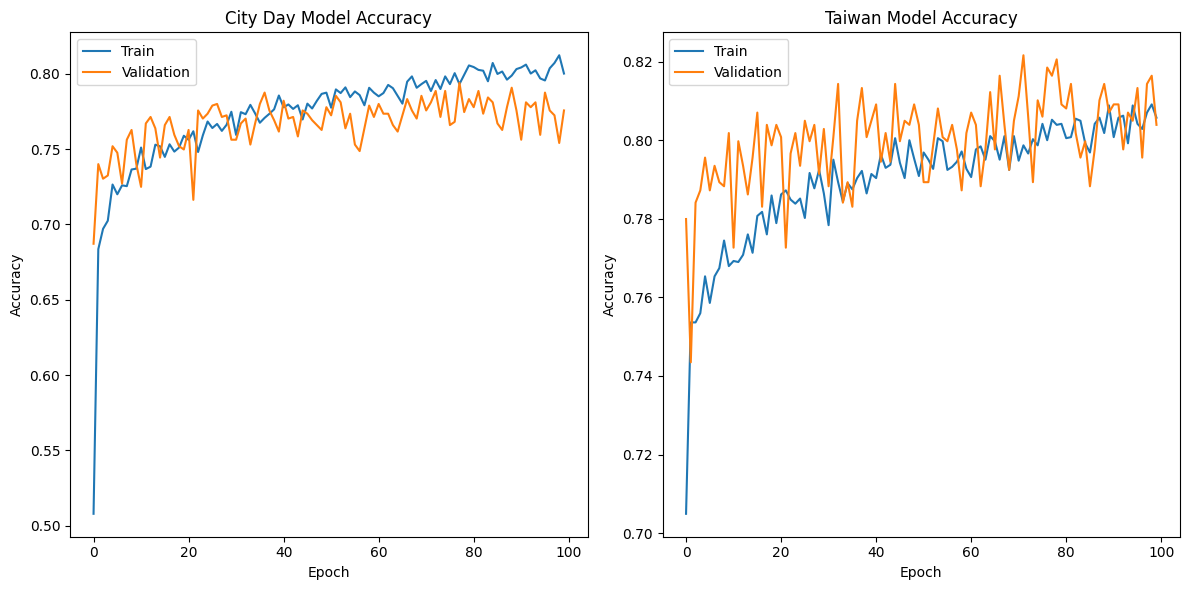

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(MLP_history_city_day.history['accuracy'])
plt.plot(MLP_history_city_day.history['val_accuracy'])
plt.title('City Day Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(MLP_history_taiwan.history['accuracy'])
plt.plot(MLP_history_taiwan.history['val_accuracy'])
plt.title('Taiwan Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

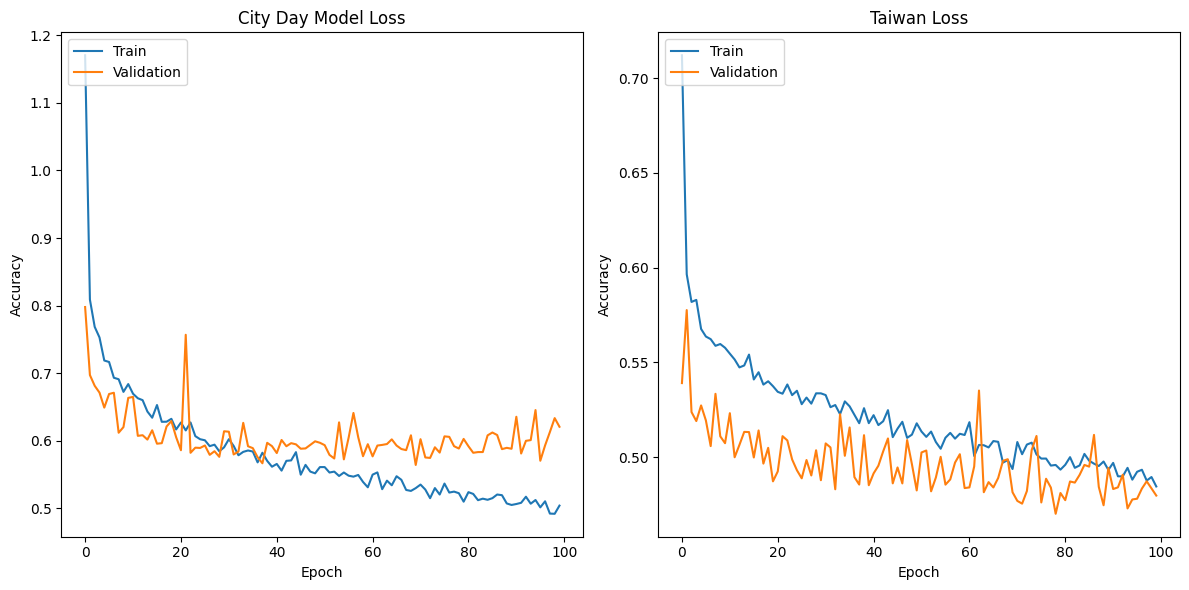

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(MLP_history_city_day.history['loss'])
plt.plot(MLP_history_city_day.history['val_loss'])
plt.title('City Day Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(MLP_history_taiwan.history['loss'])
plt.plot(MLP_history_taiwan.history['val_loss'])
plt.title('Taiwan Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

## LSTM Model

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = LSTM_model_city_day.evaluate(X_train_city_day_LSTM, y_train_city_day)
val_loss, val_accuracy = LSTM_model_city_day.evaluate(X_test_city_day_LSTM, y_test_city_day)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.7593
Training loss: 0.6996, Training accuracy: 0.7572
Validation loss: 0.7088, Validation accuracy: 0.7593


In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = LSTM_model_taiwan.evaluate(X_train_taiwan_LSTM, y_train_taiwan_LSTM)
val_loss, val_accuracy = LSTM_model_taiwan.evaluate(X_test_taiwan_LSTM, y_test_taiwan_LSTM)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 6ms/step - loss: 0.6020 - accuracy: 0.7509
Training loss: 0.5988, Training accuracy: 0.7536
Validation loss: 0.6020, Validation accuracy: 0.7509


In [ ]:
y_pred_city_day = LSTM_model_city_day.predict(X_test_city_day_LSTM)
y_pred_classes_city_day = np.argmax(y_pred_city_day, axis=1)

print("Classification Report for LSTM_model_city_day:")
print(classification_report(y_test_city_day_LSTM, y_pred_classes_city_day))

y_pred_taiwan = LSTM_model_taiwan.predict(X_test_taiwan_LSTM)
y_pred_classes_taiwan = np.argmax(y_pred_taiwan, axis=1)

print("Classification Report for MLP_model_taiwan:")
print(classification_report(y_test_taiwan_LSTM, y_pred_classes_taiwan))

37/37 [==============================] - 1s 3ms/step
Classification Report for LSTM_model_city_day:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.74      0.73      0.74       381
           2       0.66      0.66      0.66       130
           3       0.78      0.86      0.82       448
           4       0.90      0.73      0.81        49
           5       0.79      0.79      0.79       116

    accuracy                           0.76      1159
   macro avg       0.64      0.63      0.64      1159
weighted avg       0.74      0.76      0.75      1159

37/37 [==============================] - 1s 4ms/step
Classification Report for MLP_model_taiwan:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       533
           1       0.90      0.85      0.88       303
           2       0.59      0.59      0.59       340

    accuracy                           0.7

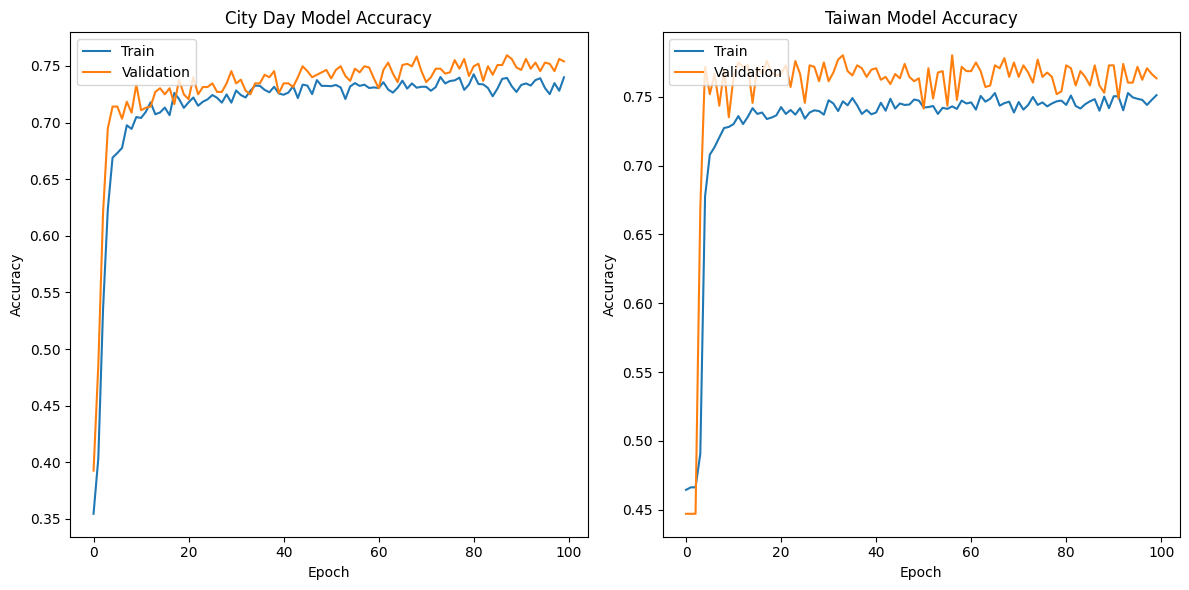

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(LSTM_history_city_day.history['accuracy'])
plt.plot(LSTM_history_city_day.history['val_accuracy'])
plt.title('City Day Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(LSTM_history_taiwan.history['accuracy'])
plt.plot(LSTM_history_taiwan.history['val_accuracy'])
plt.title('Taiwan Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

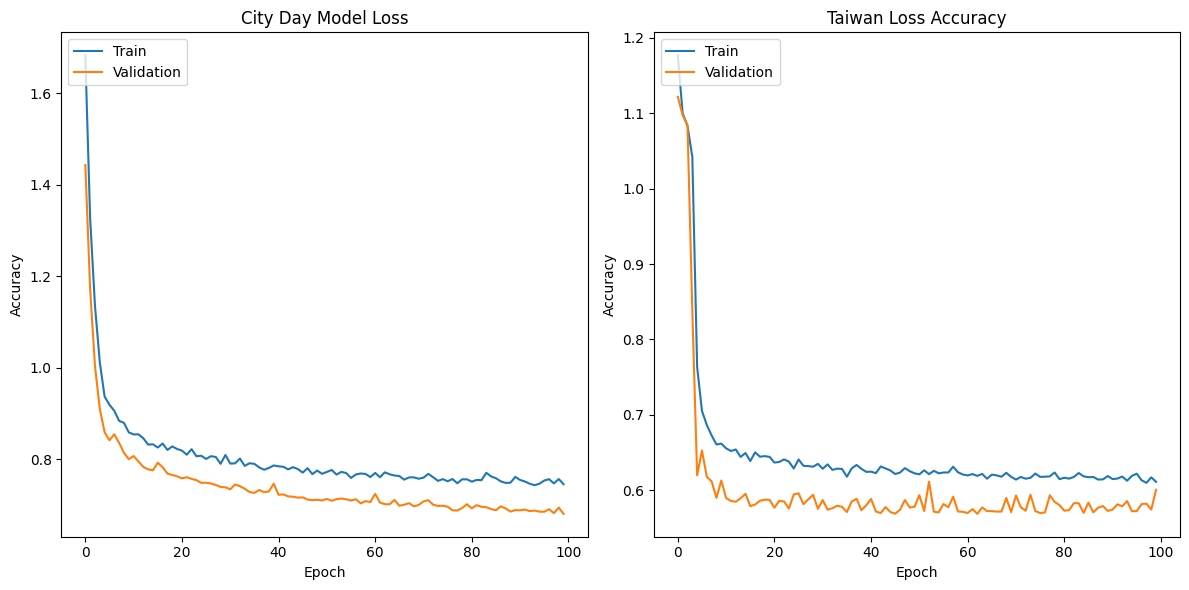

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(LSTM_history_city_day.history['loss'])
plt.plot(LSTM_history_city_day.history['val_loss'])
plt.title('City Day Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(LSTM_history_taiwan.history['loss'])
plt.plot(LSTM_history_taiwan.history['val_loss'])
plt.title('Taiwan Loss Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

## Bidirectional LSTM Model

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = BLSTM_model_city_day.evaluate(X_train_city_day_BLSTM, y_train_city_day_BLSTM)
val_loss, val_accuracy = BLSTM_model_city_day.evaluate(X_test_city_day_BLSTM, y_test_city_day_BLSTM)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.7481
Training loss: 0.6745, Training accuracy: 0.7521
Validation loss: 0.6909, Validation accuracy: 0.7481


In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = BLSTM_model_taiwan.evaluate(X_train_taiwan_BLSTM, y_train_taiwan_LSTM)
val_loss, val_accuracy = BLSTM_model_taiwan.evaluate(X_test_taiwan_BLSTM, y_test_taiwan_BLSTM)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 8ms/step - loss: 0.5562 - accuracy: 0.7696
Training loss: 0.5571, Training accuracy: 0.7712
Validation loss: 0.5562, Validation accuracy: 0.7696


In [ ]:
# Make predictions using MLP_model_city_day on the test data
y_pred_city_day = BLSTM_model_city_day.predict(X_test_city_day_BLSTM)
y_pred_classes_city_day = np.argmax(y_pred_city_day, axis=1)

# Generate classification report for MLP_model_city_day
print("Classification Report for MLP_model_city_day:")
print(classification_report(y_test_city_day_BLSTM, y_pred_classes_city_day))

# Make predictions using MLP_model_taiwan on the test data
y_pred_taiwan = BLSTM_model_taiwan.predict(X_test_taiwan_BLSTM)
y_pred_classes_taiwan = np.argmax(y_pred_taiwan, axis=1)

# Generate classification report for MLP_model_taiwan
print("Classification Report for MLP_model_taiwan:")
print(classification_report(y_test_taiwan_BLSTM, y_pred_classes_taiwan))

37/37 [==============================] - 2s 4ms/step
Classification Report for MLP_model_city_day:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.74      0.72      0.73       381
           2       0.65      0.61      0.63       130
           3       0.76      0.87      0.81       448
           4       0.92      0.69      0.79        49
           5       0.76      0.78      0.77       116

    accuracy                           0.75      1159
   macro avg       0.64      0.61      0.62      1159
weighted avg       0.73      0.75      0.73      1159

37/37 [==============================] - 2s 6ms/step
Classification Report for MLP_model_taiwan:
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       533
           1       0.96      0.85      0.90       303
           2       0.76      0.42      0.54       340

    accuracy                           0.77

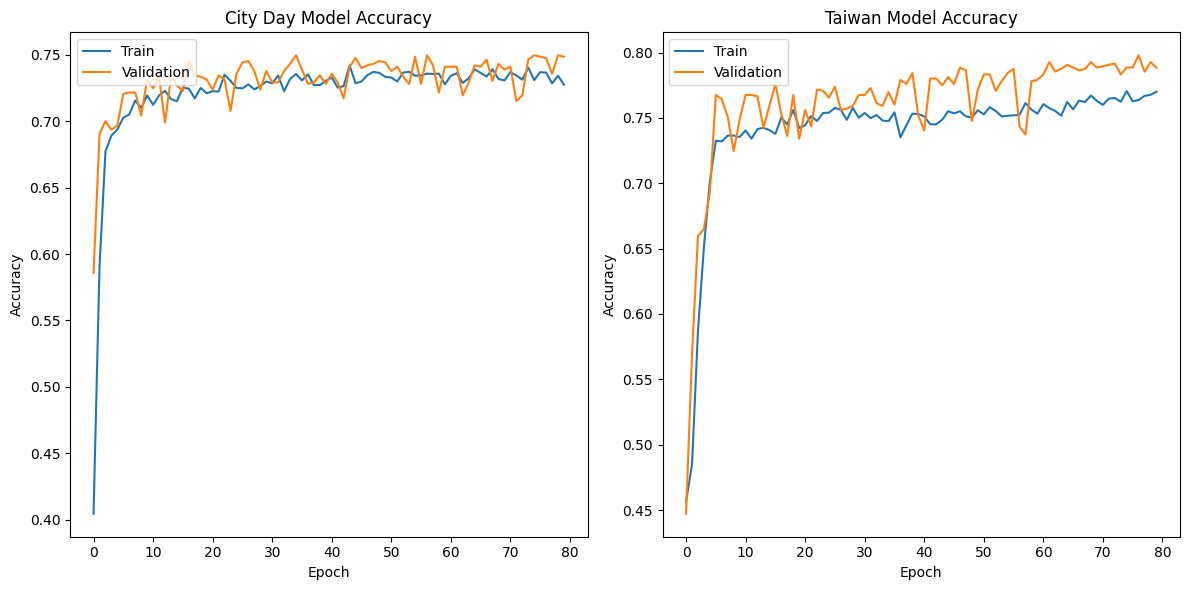

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(BLSTM_history_city_day.history['accuracy'])
plt.plot(BLSTM_history_city_day.history['val_accuracy'])
plt.title('City Day Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(BLSTM_history_taiwan.history['accuracy'])
plt.plot(BLSTM_history_taiwan.history['val_accuracy'])
plt.title('Taiwan Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

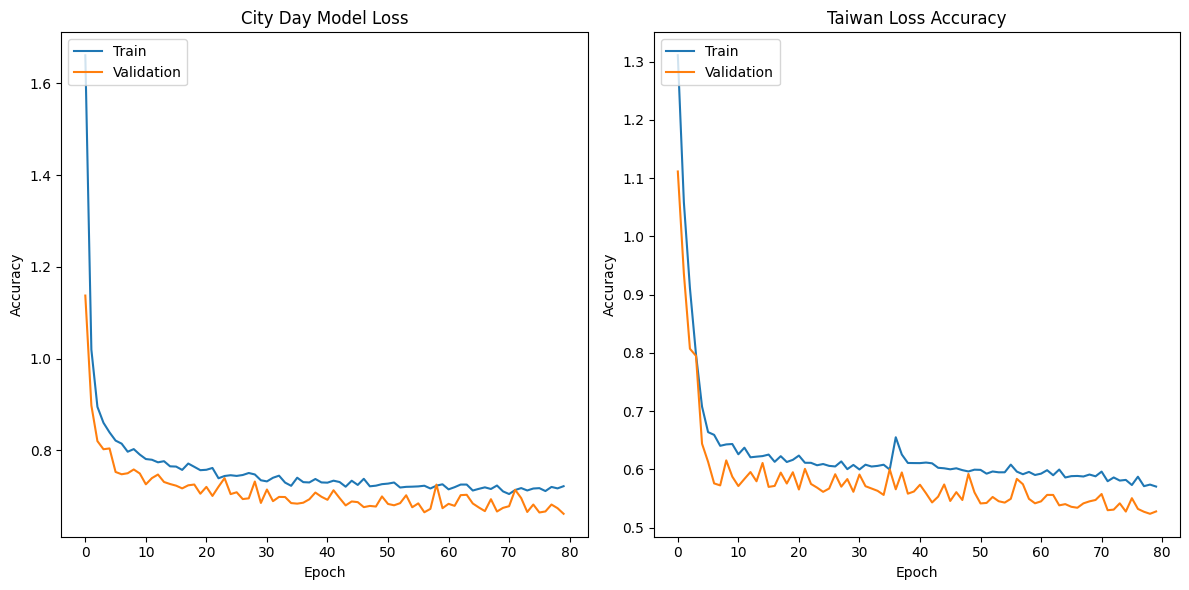

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(BLSTM_history_city_day.history['loss'])
plt.plot(BLSTM_history_city_day.history['val_loss'])
plt.title('City Day Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(BLSTM_history_taiwan.history['loss'])
plt.plot(BLSTM_history_taiwan.history['val_loss'])
plt.title('Taiwan Loss Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

## GRU

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = GRU_model_city_day.evaluate(X_train_city_day_GRU, y_train_city_day)
val_loss, val_accuracy = GRU_model_city_day.evaluate(X_test_city_day_GRU, y_test_city_day)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.7420
Training loss: 0.6828, Training accuracy: 0.7503
Validation loss: 0.7096, Validation accuracy: 0.7420


In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = GRU_model_taiwan.evaluate(X_train_taiwan_GRU, y_train_taiwan_GRU)
val_loss, val_accuracy = GRU_model_taiwan.evaluate(X_test_taiwan_GRU, y_test_taiwan_GRU)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 8ms/step - loss: 0.6217 - accuracy: 0.7738
Training loss: 0.4944, Training accuracy: 0.8267
Validation loss: 0.6217, Validation accuracy: 0.7738


In [ ]:
# Make predictions using MLP_model_city_day on the test data
y_pred_city_day = GRU_model_city_day.predict(X_test_city_day_GRU)
y_pred_classes_city_day = np.argmax(y_pred_city_day, axis=1)

# Generate classification report for MLP_model_city_day
print("Classification Report for MLP_model_city_day:")
print(classification_report(y_test_city_day_GRU, y_pred_classes_city_day))

# Make predictions using MLP_model_taiwan on the test data
y_pred_taiwan = GRU_model_taiwan.predict(X_test_taiwan_GRU)
y_pred_classes_taiwan = np.argmax(y_pred_taiwan, axis=1)

# Generate classification report for MLP_model_taiwan
print("Classification Report for MLP_model_taiwan:")
print(classification_report(y_test_taiwan_GRU, y_pred_classes_taiwan))

37/37 [==============================] - 2s 7ms/step
Classification Report for MLP_model_city_day:
              precision    recall  f1-score   support

           0       0.86      0.17      0.29        35
           1       0.70      0.81      0.75       381
           2       0.63      0.61      0.62       130
           3       0.82      0.81      0.82       448
           4       0.95      0.39      0.55        49
           5       0.69      0.72      0.71       116

    accuracy                           0.74      1159
   macro avg       0.77      0.59      0.62      1159
weighted avg       0.75      0.74      0.73      1159

37/37 [==============================] - 1s 5ms/step
Classification Report for MLP_model_taiwan:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       533
           1       0.96      0.83      0.89       303
           2       0.73      0.47      0.57       340

    accuracy                           0.77

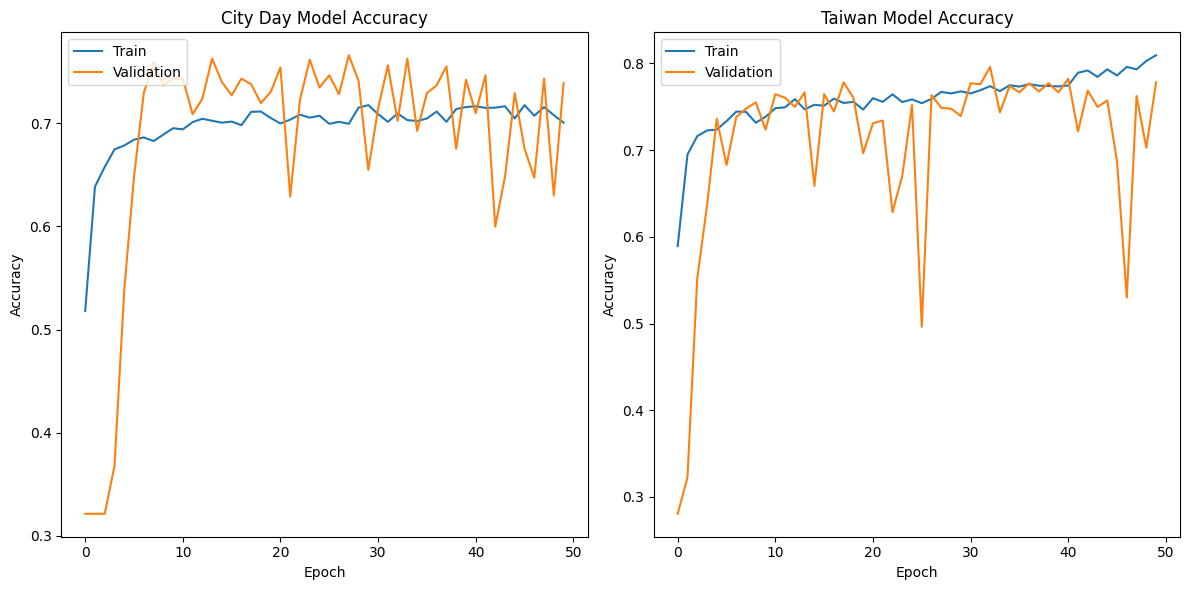

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(GRU_history_city_day.history['accuracy'])
plt.plot(GRU_history_city_day.history['val_accuracy'])
plt.title('City Day Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(GRU_history_taiwan.history['accuracy'])
plt.plot(GRU_history_taiwan.history['val_accuracy'])
plt.title('Taiwan Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

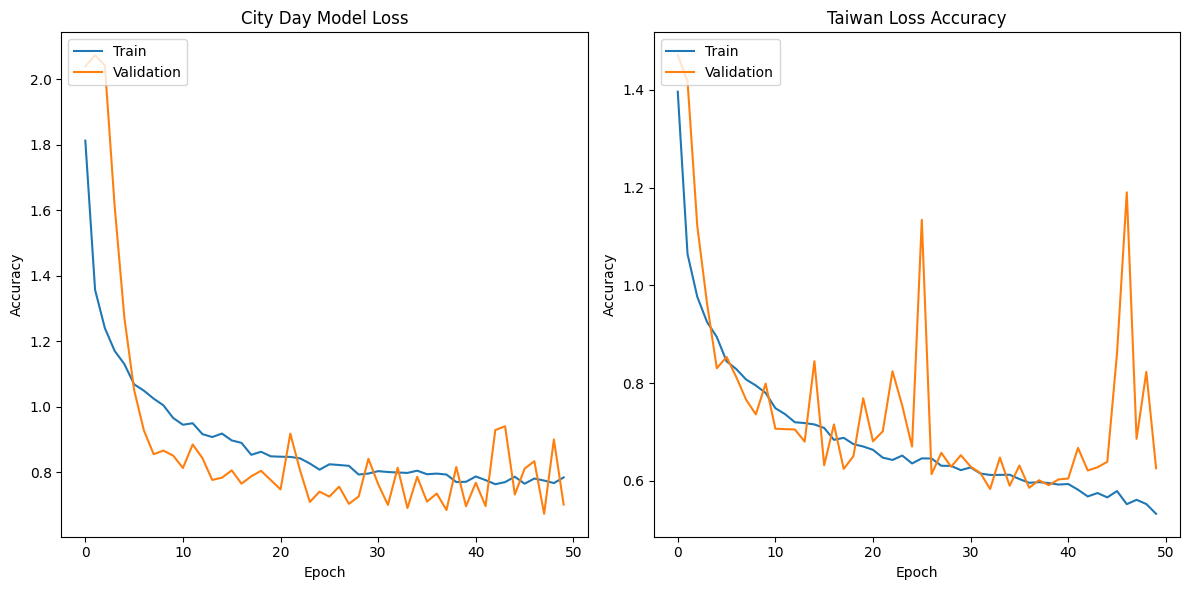

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(GRU_history_city_day.history['loss'])
plt.plot(GRU_history_city_day.history['val_loss'])
plt.title('City Day Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(GRU_history_taiwan.history['loss'])
plt.plot(GRU_history_taiwan.history['val_loss'])
plt.title('Taiwan Loss Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

## MLP Auto Encoder

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = city_day_classification_model.evaluate(X_train_city_day_auto, y_train_city_day_auto)
val_loss, val_accuracy = city_day_classification_model.evaluate(X_test_city_day_auto, y_test_city_day_auto)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

37/37 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.7386
Training loss: 0.7022, Training accuracy: 0.7408
Validation loss: 0.7091, Validation accuracy: 0.7386


In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = taiwan_auto_classification_model.evaluate(X_train_taiwan_auto, y_train_taiwan_auto)
val_loss, val_accuracy = taiwan_auto_classification_model.evaluate(X_test_taiwan_auto, y_test_taiwan_auto)
print(f'Training loss: {train_loss:.4f}, Training accuracy: {train_accuracy:.4f}')
print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

41/41 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7874
Training loss: 0.5324, Training accuracy: 0.7784
Validation loss: 0.5119, Validation accuracy: 0.7874


In [ ]:
# Make predictions using MLP_model_city_day on the test data
y_pred_city_day = city_day_classification_model.predict(X_test_city_day_auto)
y_pred_classes_city_day = np.argmax(y_pred_city_day, axis=1)

# Generate classification report for MLP_model_city_day
print("Classification Report for MLP_model_city_day:")
print(classification_report(y_test_city_day_auto, y_pred_classes_city_day))

# Make predictions using MLP_model_taiwan on the test data
y_pred_taiwan = taiwan_auto_classification_model.predict(X_test_taiwan_auto)
y_pred_classes_taiwan = np.argmax(y_pred_taiwan, axis=1)

# Generate classification report for MLP_model_taiwan
print("Classification Report for MLP_model_taiwan:")
print(classification_report(y_test_taiwan_auto, y_pred_classes_taiwan))

37/37 [==============================] - 0s 2ms/step
Classification Report for MLP_model_city_day:
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        35
           1       0.72      0.76      0.74       381
           2       0.56      0.51      0.53       130
           3       0.80      0.87      0.83       448
           4       0.81      0.61      0.70        49
           5       0.70      0.68      0.69       116

    accuracy                           0.74      1159
   macro avg       0.77      0.59      0.61      1159
weighted avg       0.74      0.74      0.73      1159

41/41 [==============================] - 0s 5ms/step
Classification Report for MLP_model_taiwan:
              precision    recall  f1-score   support

           0       0.73      0.82      0.78       474
           1       0.93      0.87      0.90       327
           2       0.75      0.69      0.72       488

    accuracy                           0.79

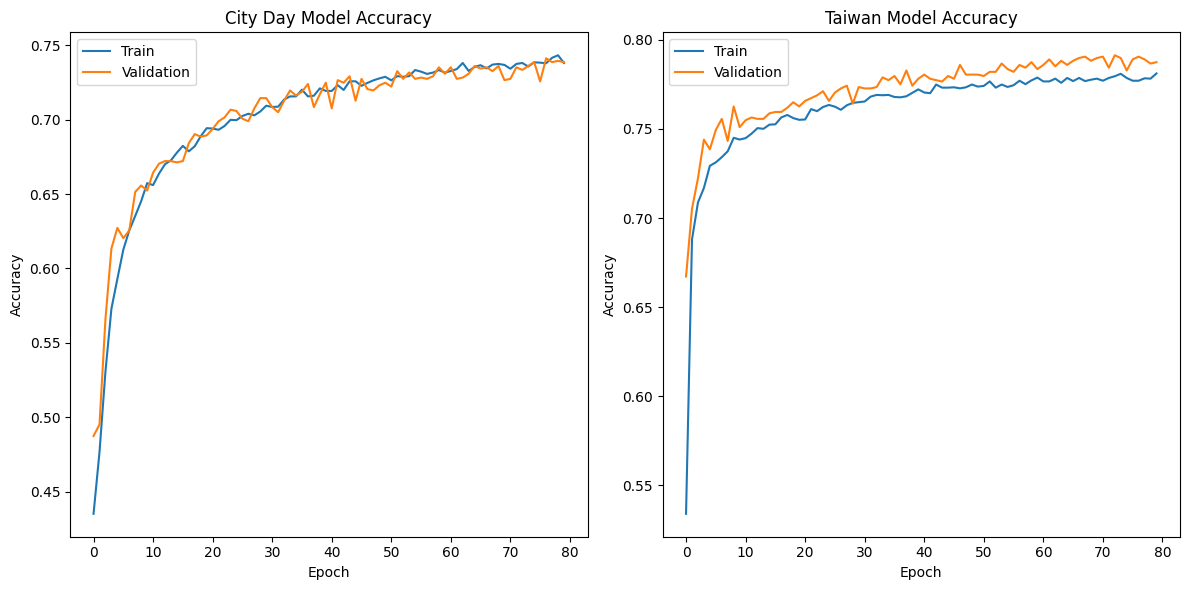

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(history_city_day_auto.history['accuracy'])
plt.plot(history_city_day_auto.history['val_accuracy'])
plt.title('City Day Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(history_taiwan_auto.history['accuracy'])
plt.plot(history_taiwan_auto.history['val_accuracy'])
plt.title('Taiwan Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

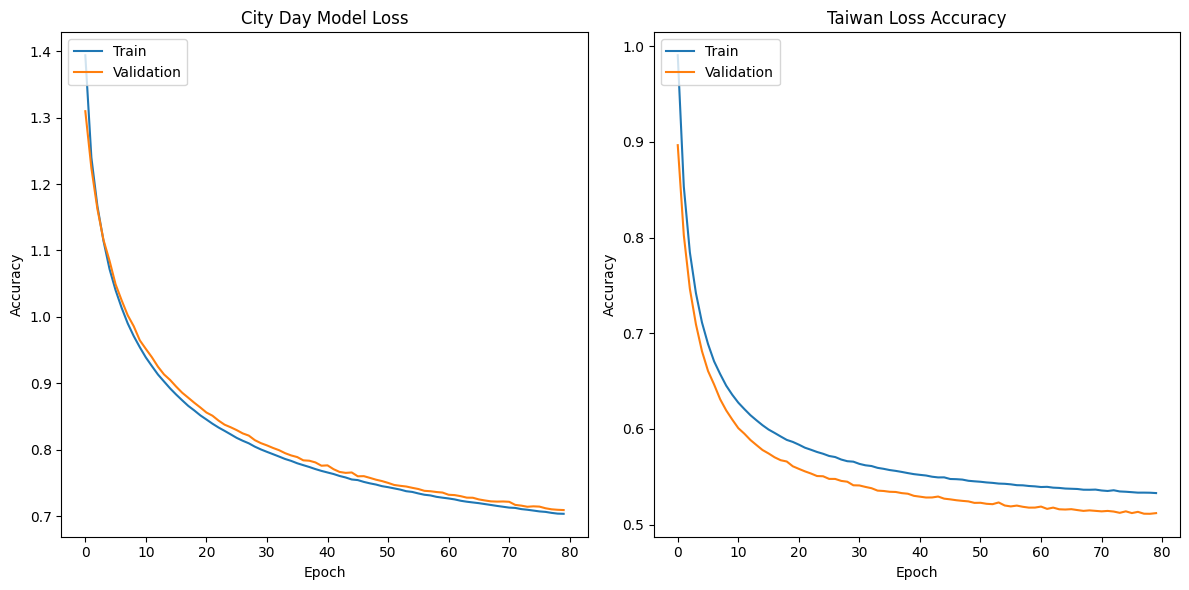

In [ ]:
plt.figure(figsize=(12, 6))

#Plot for MLP_history_city_day
plt.subplot(1, 2, 1)
plt.plot(history_city_day_auto.history['loss'])
plt.plot(history_city_day_auto.history['val_loss'])
plt.title('City Day Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot for MLP_history_taiwan
plt.subplot(1, 2, 2)
plt.plot(history_taiwan_auto.history['loss'])
plt.plot(history_taiwan_auto.history['val_loss'])
plt.title('Taiwan Loss Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#Adjust layout and show plot
plt.tight_layout()
plt.show()